# An all-sky ALMA Archive search for some target lines within a given redshift range

## Uses the `ALMAxmatch` module's `runPayloadQueryWithLines` method

### Import the `ALMAxmatch` module
- This requires adding a custom `astroquery` module to the python path for now (due to a bug in the release date format that should be fixed in the next release).

In [1]:
import sys
sys.path = ['/Users/thbrown/astroquery'] + sys.path

Import module and print valid payload keywords

In [2]:
import sys
sys.path = ['/Users/thbrown/ALMA/think_tank_code/tools/archiveDev'] + sys.path
from ALMAxmatch import archiveSearch

## 1. Define lines of interest and redshift range

### Lines:

    1. $^{12}$CO ($J=1-0$) @ 115.27120180 GHz rest frequency
    2. $^{13}$CO ($J=1-0$) @ 109.78217340 GHz rest frequency
    3. C$^{18}$O ($J=1-0$) @ 110.20135430 GHz rest frequency


In [15]:
# rest frame frequencies
rf_12CO_10 = 115.27120180 # 12CO J=1-0
rf_13CO_10 = 110.20135430 # 13CO J=1-0
rf_C18O_10 = 109.78217340 # C18O J=1-0

rest_frequencies = [rf_C18O_10, rf_13CO_10, rf_12CO_10] # list of rest frequencies
line_names = ['C18O J=1-0', '13CO J=1-0', '12CO J=1-0'] # column names for observed boolean flags 

### Search Redshift Range:

Search for the following lines at $0.0 \leq z \leq 0.05$:

In [16]:
# search redshift range
redshift_range = [0.0,0.05]

## 2. Run the archive search


### What does `runPayloadQueryWithLines` do?
1. Calculate min and max frequencies for the target lines in the redshift range
2. Create a "payload" dictionary of keywords (including frequency) that are accepted by the ALMA Archive system. See 
3. Query the service using `astroquery.alma.Alma.query` and return a table object, selecting only science data
4. Cross-match these observations with NED, returning the results in the following astropy tables:

    `archiveSearch.queryResults`: ALMA Archive information for observations that match a NED object name and have a redshift, with flags for each line specifying if the spectral windows cover the line frequency at the object's redshift.

    `archiveSearch.queryResultsNoNED`: Observations that did not have a match in NED, based on name.

    `archiveSearch.queryResultsNoNEDz`: Observations that match a NED object name but do not have a redshift.

In [17]:
# Initialise the search object
allSkyLinesQuery = archiveSearch()

In [18]:
allSkyLinesQuery.runPayloadQueryWithLines(restFreqs=rest_frequencies,
                                          redshiftRange=redshift_range,
                                          line_names=line_names, science=True)

12CO J=1-0 observed frequency 111.22913503290425 GHz in range 110.45 - 112.33
12CO J=1-0 observed frequency 114.43422984292881 GHz in range 113.49 - 115.36
12CO J=1-0 observed frequency 115.26347914689715 GHz in range 114.8 - 115.74
12CO J=1-0 observed frequency 115.25944533657567 GHz in range 114.6 - 115.54
12CO J=1-0 observed frequency 115.26013682686461 GHz in range 114.6 - 115.54
12CO J=1-0 observed frequency 115.25783189150059 GHz in range 114.6 - 115.54
12CO J=1-0 observed frequency 110.87276821225176 GHz in range 109.93 - 111.8
12CO J=1-0 observed frequency 111.16456060223233 GHz in range 110.22 - 112.1
12CO J=1-0 observed frequency 111.59957575757576 GHz in range 110.66 - 112.54
12CO J=1-0 observed frequency 110.04631290937574 GHz in range 109.11 - 110.99
12CO J=1-0 observed frequency 110.35478574047605 GHz in range 109.42 - 111.29
12CO J=1-0 observed frequency 110.77538288558839 GHz in range 109.84 - 111.71
12CO J=1-0 observed frequency 110.11779892796993 GHz in range 109.19 -

12CO J=1-0 observed frequency 114.7796007699025 GHz in range 113.85 - 115.72
12CO J=1-0 observed frequency 114.7796007699025 GHz in range 113.85 - 115.72
12CO J=1-0 observed frequency 114.7796007699025 GHz in range 114.04 - 115.91
12CO J=1-0 observed frequency 111.75516092691731 GHz in range 110.74 - 112.62
12CO J=1-0 observed frequency 114.5782326489392 GHz in range 113.62 - 115.5
12CO J=1-0 observed frequency 113.1496459386503 GHz in range 112.21 - 114.09
12CO J=1-0 observed frequency 112.30795637114727 GHz in range 111.41 - 113.28
12CO J=1-0 observed frequency 112.30795637114727 GHz in range 111.41 - 113.28
13CO J=1-0 observed frequency 110.15398808512342 GHz in range 110.05 - 110.16
13CO J=1-0 observed frequency 110.15398808512342 GHz in range 110.05 - 110.16
C18O J=1-0 observed frequency 109.24251537405219 GHz in range 108.72 - 110.6
C18O J=1-0 observed frequency 109.24251537405219 GHz in range 108.78 - 109.71
13CO J=1-0 observed frequency 109.65963569964377 GHz in range 108.72 - 

13CO J=1-0 observed frequency 109.35180016452185 GHz in range 108.42 - 110.29
12CO J=1-0 observed frequency 113.0733942362304 GHz in range 112.58 - 114.46
12CO J=1-0 observed frequency 114.54828755722635 GHz in range 113.49 - 115.48
12CO J=1-0 observed frequency 114.54828755722635 GHz in range 114.29 - 115.22
12CO J=1-0 observed frequency 114.61252362671726 GHz in range 114.14 - 115.08
12CO J=1-0 observed frequency 114.79594658115401 GHz in range 113.87 - 115.74
12CO J=1-0 observed frequency 114.79594658115401 GHz in range 113.87 - 115.74
12CO J=1-0 observed frequency 114.99452497291517 GHz in range 114.52 - 115.46
12CO J=1-0 observed frequency 114.78497265582992 GHz in range 113.85 - 115.72
12CO J=1-0 observed frequency 114.78497265582992 GHz in range 113.85 - 115.72
12CO J=1-0 observed frequency 112.32513807847769 GHz in range 111.39 - 113.26
12CO J=1-0 observed frequency 114.79937636314746 GHz in range 114.0 - 115.97
C18O J=1-0 observed frequency 109.57638894156774 GHz in range 109.

In [19]:
allSkyLinesQuery.queryResults

Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2012.1.00837.S,2A0335+096,54.66875,9.970083333333333,176.2640969511151,-35.057909888065936,[3],0.8277836843988817,976.516116235474,12m,,4112.64,2016-03-31,"[108.45..110.43GHz,31251.32kHz,1mJy/beam@10km/s,43.1uJy/beam@native, XX YY] U [110.45..112.33GHz,976.60kHz,1.1mJy/beam@10km/s,47.7uJy/beam@native, XX YY]",2606.155620549255,XX YY,2014-07-22 11:29:56,"McNamara, Brian",2A0335_111_12m_C32-5,"Sanders, Jeremy; Baum, Stefi; Russell, Helen; Combes, Francoise; Salome, Philippe; Tremblay, Grant; Donahue, Megan; O'Connell, Robert; O'Dea, Christopher; Voit, Mark; Nulsen, Paul; Oonk, Raymond; Edge, Alastair; Hamer, Stephen; Vantyghem, Adrian; Main, Robert; Wilman, Richard; Fabian, Andrew;",1.0096809521179075,0.03198805008682507,4.8730683,uid://A002/X5d50dc/X1c,uid://A002/X5d50dc/X1d,uid://A002/X877956/X176e,Understanding Molecular Gas Accretion and Feedback from Supermassive Black Holes,S,TARGET,57.07246246439364,10.60783856649499,Y,3,Galaxy groups and clusters,Cosmology,2012.1.00837.S,"[array([108.45, 110.43]), array([110.45, 112.33])]",2A0335+096,MCXC J0338.6+0958,54.64708,9.9652,0.03634,False,False,True
2012.1.00293.S,2dFGRS_S833Z022,63.656083,-22.807028000000003,219.2668373697943,-44.05193235256915,[3],1.5611029368525446,976.6572819195385,12m,,2237.76,2015-01-24,"[99.54..101.52GHz,31253.03kHz,1.1mJy/beam@10km/s,45.5uJy/beam@native, XX YY] U [101.43..103.42GHz,31253.03kHz,1.1mJy/beam@10km/s,46uJy/beam@native, XX YY] U [111.47..113.46GHz,31253.03kHz,1.3mJy/beam@10km/s,56.3uJy/beam@native, XX YY] U [113.49..115.36GHz,976.66kHz,1.6mJy/beam@10km/s,70.7uJy/beam@native, XX YY]",2538.28754513569,XX YY,2013-12-17 04:11:49,"Zwaan, Martin",2dFGRS_S833Z022,"Kuntschner, Harald; Pracy, Michael; Couch, Warrick;",1.2988195439839716,0.026072903612714565,6.0629525,uid://A002/X6802f4/X9,uid://A002/X6802f4/Xa,uid://A002/X75f169/Xa2d,The molecular gas in post-starburst galaxies,S,TARGET WVR,58.63238821639325,9.221338864245158,Y,1,"Starbursts, star formation",Active galaxies,2012.1.00293.S,"[array([ 99.54, 101.52]), array([101.43, 103.42]), array([111.47, 113.46]), array([113.49, 115.36])]",2DFGRSS833Z022,GALEXASC J041437.44-224824.2,63.65608,-22.80703,0.007314,False,False,True
2015.1.01287.S,2MASS_J04230607+2801194,65.77529200000151,28.022083000008706,169.75215068077287,-15.04106685581405,[3],0.4801023910739358,488.24905836515643,12m,,1149.12,2017-11-03,"[100.06..102.04GHz,31249.02kHz,1.6mJy/beam@10km/s,65.4uJy/beam@native, XX YY] U [101.95..103.94GHz,31249.02kHz,1.6mJy/beam@10km/s,66uJy/beam@native, XX YY] U [112.51..114.49GHz,31249.02kHz,2.3mJy/beam@10km/s,98.7uJy/beam@native, XX YY] U [114.80..115.74GHz,488.27kHz,3.5mJy/beam@10km/s,221.3uJy/beam@native, XX YY]",1264.5905317107643,XX YY,2016-06-17 12:21:44,"Patience, Jenny",2MASS_J0_a_03_TE,"van der Plas, Gerrit; Casassus, Simon; Bulger, Joanna; Pinte, Christophe; Ward-Duong, Kimberly; Menard, Francois;",2.267927610366247,0.041281671113882375,0

In [20]:
print("There are ", len(allSkyLinesQuery.queryResults), "observations of 12CO, 13CO, OR C18O in the target redshift range")

There are  411 observations of 12CO, 13CO, OR C18O in the target redshift range


Because our search results have accompanying archival and NED data, we can take a

## 3. Take a look at your results

Text(0.5,0,'redshift')

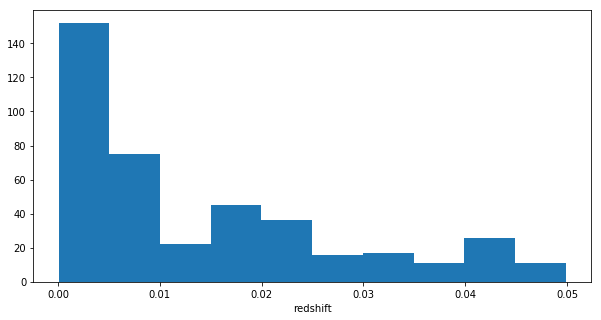

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(allSkyLinesQuery.queryResults['NED Redshift'])
plt.xlabel("redshift")

Text(0,0.5,'No. Observations')

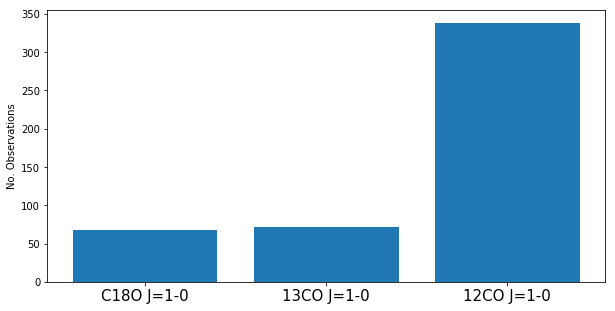

In [37]:
C18O_observed = allSkyLinesQuery.queryResults[line_names[0]]
_13CO_observed = allSkyLinesQuery.queryResults[line_names[1]]
_12CO_observed = allSkyLinesQuery.queryResults[line_names[2]]

perfomance = [len(C18O_observed[C18O_observed==True]),
               len(_13CO_observed[_13CO_observed==True]),
               len(_12CO_observed[_12CO_observed==True])]

xpos = [0,1,2]

plt.figure(figsize=(10,5))
plt.bar(xpos, perfomance)
plt.xticks(xpos, line_names, fontsize=15)
plt.ylabel('No. Observations')

### Group by NED source name

In [56]:
observations = allSkyLinesQuery.queryResults.group_by('NED source name')

Iterate over the group sub-tables and corresponding keys with:

In [62]:
n = 0
for key, group in zip(observations.groups.keys, observations.groups):
    # if all three lines detected
    if ((True in group['12CO J=1-0']) & 
        (True in group['13CO J=1-0']) &
        (True in group['C18O J=1-0'])):
        
        print('****** {0} *******'.format(key['NED source name']))
        display(group)
        print('')
        n= n+1


****** 2MASX J17232194-0017009 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2017.1.01306.S,IRAS17208-0014,260.8414291666761,-0.2836000000000146,22.221058227478323,19.353414843772196,[3],0.3991153724632779,3905.8156169585013,12m,,3568.32,2019-02-25,"[92.48..94.35GHz,3905.83kHz,720.5uJy/beam@10km/s,29.4uJy/beam@native, XX YY] U [94.30..96.18GHz,3905.83kHz,714.7uJy/beam@10km/s,29.4uJy/beam@native, XX YY] U [104.34..106.22GHz,3905.83kHz,710.6uJy/beam@10km/s,30.8uJy/beam@native, XX YY] U [106.22..108.09GHz,3905.83kHz,719.4uJy/beam@10km/s,31.4uJy/beam@native, XX YY]",10831.671076503468,XX YY,2018-01-11 14:36:50,"Sliwa, Kazimierz",IRAS1720_a_03_TM1,,0.7105586564431904,0.015099803536581618,4.487539,uid://A001/X1284/X730,uid://A001/X1284/X731,uid://A002/Xc9020b/X7bcf,Tracing the Enrichment of the ISM in Extreme Starbursts,S,TARGET,62.82056617901485,4.291229220110475,Y,0,Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG),Galaxy evolution,2017.1.01306.S,"[array([92.48, 94.35]), array([94.3 , 96.18]), array([104.34, 106.22]), array([106.22, 108.09])]",IRAS17208-0014,2MASX J17232194-0017009,260.84148,-0.28359,0.04281,True,True,False
2016.1.00177.S,IRAS_F17207-0014,260.8415999999851,-0.283799999999998,22.220960676499203,19.353168445343538,[3],1.852152329162209,3905.8732564140055,12m,,1905.12,2018-03-30,"[95.66..97.53GHz,3905.87kHz,805.2uJy/beam@10km/s,33.4uJy/beam@native, XX YY] U [97.66..99.53GHz,3905.87kHz,802uJy/beam@10km/s,33.6uJy/beam@native, XX YY] U [107.89..109.77GHz,3905.87kHz,844.5uJy/beam@10km/s,37.2uJy/beam@native, XX YY] U [109.60..111.47GHz,3905.87kHz,882.1uJy/beam@10km/s,39.1uJy/beam@native, XX YY]",10503.694943066204,XX YY,2017-01-05 14:17:16,"Lutz, Dieter",IRAS_F17_a_03_TM1,"Contursi, Alessandra; Gracia-Carpio, Javier; Genzel, Reinhard; Davies, Richard; Tacconi, Linda; Sturm, Eckhard; Janssen, Annemieke; Veilleux, Sylvain;",0.844457534959015,0.01778386900493336,6.1821775,uid://A001/X87a/X28d,uid://A001/X87a/X28e,uid://A002/Xbc8613/X266c,Identifying molecular outflows in our neighborhood,S,TARGET,60.83215910789986,9.169622210249454,Y,0,"Outflows, jets, feedback, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2016.1.00177.S,"[array([95.66, 97.53]), array([97.66, 99.53]), array([107.89, 109.77]), array([109.6 , 111.47])]",IRASF17207-0014,2MASX J17232194-0017009,260.84148,-0.28359,0.04281,False,False,True
2016.1.00140.S,IRASf17207-0014,260.84142916662347,-0.2836000000000549,22.221058227451238,19.353414843818218,[3],0.35008472154933007,3906.351323620382,12m,,151.2,2017-12-30,"[97.50..99.49GHz,31250.81kHz,2.4mJy/beam@10km/s,95.8uJy/beam@native, XX YY] U [99.50..101.49GHz,31250.81kHz,2.4mJy/beam@10km/s,96.4uJy/beam@native, XX YY] U [109.60..111.48GHz,3906.35kHz,2.5mJy/beam@10km/s,112.6uJy/beam@native, XX YY] U [111.50..113.49GHz,31250.81kHz,2.8mJy/beam@10km/s,119.5uJy/beam@native, XX YY]",10505.476011329818,XX YY,2016-10-06 18:59:48,"Iono, Daisuke",IRASf172_a_03_TM1,"Yun, Min; Ando, Misaki; Michiyama, Tomon


****** ARP 220 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.00113.S,ARP220,233.7384041666667,23.50317777777778,36.627305952700226,53.02850549164822,[3],0.053279525709232764,3906.0797615918846,12m,,1215.648,2016-11-27,"[94.06..95.94GHz,3906.08kHz,921.4uJy/beam@10km/s,37.9uJy/beam@native, XX YY] U [95.94..97.81GHz,3906.08kHz,913.9uJy/beam@10km/s,37.9uJy/beam@native, XX YY] U [106.56..108.44GHz,3906.08kHz,930.9uJy/beam@10km/s,40.7uJy/beam@native, XX YY] U [107.94..109.81GHz,3906.08kHz,953.9uJy/beam@10km/s,42uJy/beam@native, XX YY]",10663.470009062945,XX YY,2015-10-18 17:29:47,"Scoville, Nick",ARP220_b_03_TE,"Torrey, Paul; Koda, Jin; Walter, Fabian; Murchikova, Lena; Hernquist, Lars; Sanders, David; Hayward, Christopher; Cox, Pierre; Barnes, Joshua; Thompson, Todd; Robertson, Brant; Vanden Bout, Paul; van der Werf, Paul; Decarli, Roberto; Genzel, Reinhard; Armus, Lee; Tacconi, Linda; Vlahakis, Catherine; Sheth, Kartik;",0.9308708145198825,0.019754150475718615,1.0218359,uid://A001/X2d6/X32,uid://A001/X2d6/X33,uid://A002/Xac2df7/X1b18,Arp 220 Nuclear Disks at 50 mas Resolution,S,TARGET,61.80306659404423,0.5478316056798604,Y,3,Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG),Galaxy evolution,2015.1.00113.S,"[array([94.06, 95.94]), array([95.94, 97.81]), array([106.56, 108.44]), array([107.94, 109.81])]",ARP220,ARP 220,233.73856,23.50314,0.018126,True,True,False
2017.1.00042.S,ARP220,233.73843333330217,23.50318916667,36.62733536968483,53.028482424336694,[3],0.09499703211970881,976.4962484675956,12m,,2122.848,2018-12-02,"[94.06..95.94GHz,976.50kHz,657.2uJy/beam@10km/s,27uJy/beam@native, XX YY] U [95.88..97.87GHz,31247.88kHz,654uJy/beam@10km/s,26.3uJy/beam@native, XX YY] U [106.51..108.49GHz,31247.88kHz,675.9uJy/beam@10km/s,28.6uJy/beam@native, XX YY] U [107.88..109.87GHz,31247.88kHz,692.9uJy/beam@10km/s,29.5uJy/beam@native, XX YY]",3051.228923472357,XX YY,2017-11-14 15:20:20,"Scoville, Nick",ARP220_c_03_TM1,"Koda, Jin; Walter, Fabian; Murchikova, Lena; Hernquist, Lars; Sanders, David; Hayward, Christopher; Barnes, Joshua; Thompson, Todd; Vanden Bout, Paul; Zschaechner, Laura; Yun, Min; Armus, Lee; Tacconi, Linda; Vlahakis, Catherine; Sheth, Kartik;",0.6759049202149364,0.013887624754324954,4.2110424,uid://A001/X1288/Xd60,uid://A001/X1288/Xd61,uid://A002/Xc6d2f9/X431f,Arp 220 Nuclear Disks at 0.027-0.05'' Resolution,S,TARGET,61.78592572419391,0.832956554067537,Y,0,"Starbursts, star formation, Merging and interacting galaxies",Active galaxies,2017.1.00042.S,"[array([94.06, 95.94]), array([95.88, 97.87]), array([106.51, 108.49]), array([107.88, 109.87])]",ARP220,ARP 220,233.73856,23.50314,0.018126,True,True,False
2017.1.00042.S,ARP220,233.73843333337174,23.503189166672037,36.6273353697145,53.028482424275424,[3],0.32814923895087994,976.45030733727,12m,,3084.48,2019-01-26,"[98.36..100.34GHz,31246.60kHz,818.5uJy/beam@10km/s,33.3uJy/beam@native, XX YY] U [100.24..102.23GHz,31246.60kHz,820.6uJy/beam@10km/s,33.7uJy/beam@native, 


****** IC 1623 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2016.2.00042.S,vv114,16.94666666672407,-17.506944444450262,145.1961896715522,-79.66485895253874,[3],13.476852048993674,976.5124590478861,7m,,3568.32,2018-08-15,"[98.33..100.32GHz,15624.21kHz,11.4mJy/beam@10km/s,463.1uJy/beam@native, XX YY] U [100.01..102.00GHz,15624.21kHz,11.4mJy/beam@10km/s,467.5uJy/beam@native, XX YY] U [110.22..112.21GHz,976.51kHz,12.6mJy/beam@10km/s,543.7uJy/beam@native, XX YY] U [111.96..113.96GHz,976.51kHz,13.7mJy/beam@10km/s,596.4uJy/beam@native, XX YY]",2568.7535856163836,XX YY,2017-08-01 10:53:42,"Saito, Toshiki",vv114_a_03_7M,"Ando, Misaki; Michiyama, Tomonari; Yun, Min; Sliwa, Kazimierz; Iono, Daisuke; Nakanishi, Kouichiro; Ueda, Junko; Motohara, Kentaro; Yamashita, Takuji; Bouché, Nicolas; Inami, Hanae;",12.624418013460346,0.25456595752590977,5.186,uid://A001/X1262/Xdc,uid://A001/X1262/Xdd,uid://A002/Xc2ec9c/X2c4,The True Aspect of Gas-rich Merging Galaxies,S,TARGET,59.3522602227453,47.754617668529235,Y,0,"Merging and interacting galaxies, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2016.2.00042.S,"[array([ 98.33, 100.32]), array([100.01, 102. ]), array([110.22, 112.21]), array([111.96, 113.96])]",VV114,IC 1623,16.94658,-17.50703,0.020067,False,False,True
2013.1.00469.S,VV114,16.946350477037736,-17.50701111116915,145.19474881155168,-79.66502792835925,[3],2.6356681862470714,3906.7083233749036,12m,,2540.16,2016-03-04,"[93.32..95.19GHz,3906.71kHz,647.7uJy/beam@10km/s,26.5uJy/beam@native, XX YY] U [95.07..96.94GHz,3906.71kHz,644uJy/beam@10km/s,26.6uJy/beam@native, XX YY] U [105.26..107.14GHz,3906.71kHz,637.1uJy/beam@10km/s,27.7uJy/beam@native, XX YY] U [107.06..108.93GHz,3906.71kHz,646.2uJy/beam@10km/s,28.3uJy/beam@native, XX YY]",10753.1017872218,XX YY,2014-12-28 19:39:26,"Sliwa, Kazimierz",VV114_a_03_TE,"Krips, Melanie; Wilson, Christine; Iono, Daisuke;",0.637091395011652,0.013628667043276395,2.271671,uid://A001/X120/X2a,uid://A001/X120/X2b,uid://A002/X98124f/X3982,The Warm Molecular Gas of VV 114,S,TARGET,62.30031597065838,13.203596513066406,Y,0,"Starbursts, star formation, Merging and interacting galaxies",Active galaxies,2013.1.00469.S,"[array([93.32, 95.19]), array([95.07, 96.94]), array([105.26, 107.14]), array([107.06, 108.93])]",VV114,IC 1623,16.94658,-17.50703,0.020067,True,True,False
2013.1.01057.S,vv114,16.9467,-17.5069,145.19626782629928,-79.66480613901771,[3],1.122445154581778,3905.9942432309967,12m,,1330.56,2016-02-13,"[95.31..97.18GHz,3905.99kHz,1.1mJy/beam@10km/s,45.6uJy/beam@native, XX YY] U [97.18..99.06GHz,3905.99kHz,1.1mJy/beam@10km/s,44.9uJy/beam@native, XX YY] U [107.31..109.18GHz,3905.99kHz,1.1mJy/beam@10km/s,48uJy/beam@native, XX YY] U [109.18..111.05GHz,3905.99kHz,1.1mJy/beam@10km/s,50.1uJy/beam@native, XX YY]",10543.59402670219,XX YY,2014-07-04 08:24:48,"Saito, Toshiki",vv114_d_03_TE_tuning4,"Kawabe, Ryohei; Sugai, Hajime; Nakanishi, Kouichiro; Lee, Minju; Hagiwara, Yoshiaki; Tateuchi


****** MESSIER 066 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.01538.S,NGC3627,170.0616617823787,12.994204697345458,241.95490900578352,64.4195048244129,[3],0.5848953060963006,488.3037057164622,12m,mosaic,333.506,2018-04-21,"[99.87..101.75GHz,1953.21kHz,3mJy/beam@10km/s,125.3uJy/beam@native, XX YY] U [101.51..103.49GHz,31251.44kHz,3mJy/beam@10km/s,122.2uJy/beam@native, XX YY] U [111.87..113.75GHz,3906.43kHz,3.6mJy/beam@10km/s,163.4uJy/beam@native, XX YY] U [114.80..115.74GHz,488.30kHz,5.6mJy/beam@10km/s,357.4uJy/beam@native, XX YY]",1264.8751684985566,XX YY,2016-08-11 19:53:09,"Paladino, Rosita",NGC3627_a_03_TE,"Beuther, Henrik; Liuzzo, Elisabetta; Brand, Jan; Massardi, Marcella; Rygl, Kazi; Casasola, Viviana; Orru', Emanuela; Mignano, Arturo; Gregorini, Loretta;",3.64646158294453,0.07537826940238554,1.0600144,uid://A001/X2fa/X31f,uid://A001/X2fa/X320,uid://A002/Xb68dbd/X5eee,Giant molecular clouds properties along the bar of NGC3627,S,TARGET,192.48999607448883,2.9281822426058897,Y,0,"Spiral galaxies, Giant Molecular Clouds (GMC) properties",Local Universe,2015.1.01538.S,"[array([ 99.87, 101.75]), array([101.51, 103.49]), array([111.87, 113.75]), array([114.8 , 115.74])]",NGC3627,MESSIER 066,170.06235,12.99154,0.002425,False,False,True
2015.1.01538.S,NGC3627,170.06166194198224,12.994204840609283,241.95490895744297,64.41950503484684,[3],1.471422258854062,488.24939846895916,12m,mosaic,667.014,2017-06-07,"[99.87..101.75GHz,1953.08kHz,2.8mJy/beam@10km/s,119.7uJy/beam@native, XX YY] U [101.51..103.49GHz,31249.27kHz,2.8mJy/beam@10km/s,117uJy/beam@native, XX YY] U [111.87..113.75GHz,3906.16kHz,3.5mJy/beam@10km/s,156.6uJy/beam@native, XX YY] U [114.80..115.74GHz,488.27kHz,5.3mJy/beam@10km/s,336.7uJy/beam@native, XX YY]",1264.5949512624786,XX YY,2016-01-24 05:25:35,"Paladino, Rosita",NGC3627_a_03_TC,"Beuther, Henrik; Liuzzo, Elisabetta; Brand, Jan; Massardi, Marcella; Rygl, Kazi; Casasola, Viviana; Orru', Emanuela; Mignano, Arturo; Gregorini, Loretta;",3.496325400793068,0.07210175998088675,3.8410988,uid://A001/X2fa/X31f,uid://A001/X2fa/X322,uid://A002/Xaf4574/X10a8,Giant molecular clouds properties along the bar of NGC3627,S,TARGET,192.49002872880254,10.995947872103498,Y,0,"Spiral galaxies, Giant Molecular Clouds (GMC) properties",Local Universe,2015.1.01538.S,"[array([ 99.87, 101.75]), array([101.51, 103.49]), array([111.87, 113.75]), array([114.8 , 115.74])]",NGC3627,MESSIER 066,170.06235,12.99154,0.002425,False,False,True
2015.1.00978.S,NGC_3627,170.0626082999933,12.992326203722078,241.95966967905807,64.41911294748873,[3],1.4820294309009963,976.582459241296,12m,mosaic,188.612,2017-06-08,"[99.82..101.69GHz,15625.32kHz,3mJy/beam@10km/s,125.7uJy/beam@native, XX YY] U [101.82..103.68GHz,15625.32kHz,3mJy/beam@10km/s,126.9uJy/beam@native, XX YY] U [112.30..114.17GHz,15625.32kHz,3.8mJy/beam@10km/s,171.2uJy/beam@native, XX YY] U [114.52..115.46GHz,976.58kHz,5.1mJy/beam@10km/s,328.6uJy/beam@native, XX YY]",2535.733332422808,XX YY,2016-03-17 


****** MESSIER 074 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.00532.S,ngc628,24.174049999999998,15.783461,138.617020270308,-45.705372808682,[3],48.816349649283346,1953.3442698402137,TP,,11089.68,2016-08-21,"[100.00..101.99GHz,3906.69kHz,19.8mJy/beam@10km/s,813.4uJy/beam@native, XX YY] U [101.91..103.90GHz,3906.69kHz,19.9mJy/beam@10km/s,824.7uJy/beam@native, XX YY] U [112.25..114.24GHz,3906.69kHz,25.7mJy/beam@10km/s,1.1mJy/beam@native, XX YY] U [114.50..115.49GHz,1953.35kHz,34.3mJy/beam@10km/s,2.1mJy/beam@native, XX YY]",5070.927030567965,XX YY,2015-01-17 18:40:44,"Schinnerer, Eva",ngc628_b_03_TP,"Dobbs, Clare; Querejeta, Miguel; Garcia-Burillo, Santiago; Hughes, Annie; Meijerink, Rowin; Meier, David; Pety, Jérôme; Adamo, Angela; Leroy, Adam; Meidt, Sharon; Colombo, Dario; Rand, Richard;",25.71019718950255,0.4999224905988125,5.5460167,uid://A001/X12f/X2c4,uid://A002/X9908b7/X49,uid://A002/X99c183/X4b2b,The Dense Gas Fraction and Its Dependence on Galactic Environment,S,TARGET WVR,58.47100370103654,865.2937512316405,Y,0,Giant Molecular Clouds (GMC) properties,ISM and star formation,2013.1.00532.S,"[array([100. , 101.99]), array([101.91, 103.9 ]), array([112.25, 114.24]), array([114.5 , 115.49])]",NGC628,MESSIER 074,24.17395,15.78366,0.002192,False,False,True
2013.1.00532.S,ngc628,24.174049565134432,15.783460372295597,138.6170221714432,-45.705370165264746,[3],2.1708011653215973,3906.595283329245,12m,mosaic,391.267,2016-02-27,"[95.96..97.84GHz,3906.61kHz,6.6mJy/beam@10km/s,273.2uJy/beam@native, XX YY] U [97.57..99.44GHz,3906.61kHz,6.5mJy/beam@10km/s,273.8uJy/beam@native, XX YY] U [108.03..109.90GHz,3906.61kHz,6.9mJy/beam@10km/s,302uJy/beam@native, XX YY] U [109.82..111.70GHz,3906.61kHz,7.5mJy/beam@10km/s,334.7uJy/beam@native, XX YY]",10486.261651473555,XX YY,2014-12-08 03:30:22,"Schinnerer, Eva",ngc628_a_03_TE,"Dobbs, Clare; Querejeta, Miguel; Garcia-Burillo, Santiago; Hughes, Annie; Meijerink, Rowin; Meier, David; Pety, Jérôme; Adamo, Angela; Leroy, Adam; Meidt, Sharon; Colombo, Dario; Rand, Richard;",6.859436188526841,0.1464489272297195,2.3011422,uid://A001/X12f/X2ba,uid://A001/X12f/X2bb,uid://A002/X960614/X35a2,The Dense Gas Fraction and Its Dependence on Galactic Environment,S,TARGET,296.1476364968122,17.365251324476297,Y,0,Giant Molecular Clouds (GMC) properties,ISM and star formation,2013.1.00532.S,"[array([95.96, 97.84]), array([97.57, 99.44]), array([108.03, 109.9 ]), array([109.82, 111.7 ])]",NGC628,MESSIER 074,24.17395,15.78366,0.002192,True,True,False
2013.1.00532.S,ngc628,24.174050000000005,15.783460999999994,138.6170202703079,-45.70537280868199,[3],50.65724357814106,3905.9354201282717,TP,,39214.08,2017-02-02,"[95.90..97.90GHz,3906.32kHz,17.3mJy/beam@10km/s,697.3uJy/beam@native, XX YY] U [97.51..99.50GHz,3906.32kHz,17.2mJy/beam@10km/s,698.1uJy/beam@native, XX YY] U [107.97..109.96GHz,3906.32kHz,17.9mJy/beam@10km/s,765.6uJy/beam@native, XX YY] U [109.76..111.75GHz,3906.32kHz,19.7mJy/beam@10km/s,849.8uJy/beam@native, X


****** MESSIER 083 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2016.1.00164.S,M83,204.25312499995323,-29.86611111112579,314.5827937253095,31.972437995817824,[3],1.7014935722767068,1952.9543739138455,12m,,3991.68,2018-02-18,"[95.07..96.94GHz,1952.96kHz,649.1uJy/beam@10km/s,26.8uJy/beam@native, XX YY] U [96.84..98.71GHz,1952.96kHz,643uJy/beam@10km/s,26.8uJy/beam@native, XX YY] U [107.06..108.94GHz,1952.96kHz,655.9uJy/beam@10km/s,28.7uJy/beam@native, XX YY] U [108.83..110.71GHz,1952.96kHz,675.8uJy/beam@10km/s,29.9uJy/beam@native, XX YY]",5288.0223681898415,XX YY,2016-12-23 10:29:27,"Harada, Nanase",M83_a_03_TM1,"Riquelme, Denise; Watanabe, Yoshimasa; Aalto, Susanne; Martin, Sergio; Costagliola, Francesco; Sakamoto, Kazushi; Aladro, Rebeca;",0.6558680982569864,0.013986931090902772,3.5287633,uid://A001/X87a/X9ef,uid://A001/X87a/X9f0,uid://A002/Xbc0724/X7456,Chemical Diagnostics of Extragalactic ISM: Shock-Induced Evolution in M83 Nucleus,S,TARGET,61.23218008813326,9.95072434502337,Y,0,"Starbursts, star formation, Galaxy chemistry",Active galaxies,2016.1.00164.S,"[array([95.07, 96.94]), array([96.84, 98.71]), array([107.06, 108.94]), array([108.83, 110.71])]",M83,MESSIER 083,204.25396,-29.86542,0.001711,True,True,False
2015.1.00175.S,M83,204.25373627465964,-29.86555555555463,314.58354078151916,31.972871619531144,[3],2.176028967062236,1953.071912243956,12m,,3810.24,2018-02-18,"[95.06..96.94GHz,1953.10kHz,767.9uJy/beam@10km/s,31.7uJy/beam@native, XX YY] U [96.84..98.71GHz,1953.10kHz,760.7uJy/beam@10km/s,31.7uJy/beam@native, XX YY] U [107.06..108.94GHz,1953.10kHz,775.9uJy/beam@10km/s,34uJy/beam@native, XX YY] U [108.84..110.71GHz,1953.10kHz,799.5uJy/beam@10km/s,35.3uJy/beam@native, XX YY]",5288.636492202248,XX YY,2016-04-10 01:08:11,"Harada, Nanase",M83_b_03_TE,"Riquelme, Denise; Watanabe, Yoshimasa; Aalto, Susanne; Martin, Sergio; Costagliola, Francesco; Sakamoto, Kazushi; Aladro, Rebeca;",0.7759401854621862,0.016547475361786874,2.8270516,uid://A001/X2df/Xe1,uid://A001/X2df/Xe2,uid://A002/Xb18ac0/X85c9,Chemistry in the Brightest Face-On Starburst Galaxy,S,TARGET,61.232180953107054,12.403773126556713,Y,0,"Starbursts, star formation",Active galaxies,2015.1.00175.S,"[array([95.06, 96.94]), array([96.84, 98.71]), array([107.06, 108.94]), array([108.84, 110.71])]",M83,MESSIER 083,204.25396,-29.86542,0.001711,True,True,False
2012.1.00762.S,m83,204.26889271163074,-29.839842502118433,314.60499093131847,31.995295925289568,[3],0.8138276581340285,488.3148748201094,12m,mosaic,87.538,2015-05-16,"[99.91..101.79GHz,976.64kHz,12mJy/beam@10km/s,509.3uJy/beam@native, XX YY] U [101.79..103.66GHz,976.64kHz,12mJy/beam@10km/s,512.4uJy/beam@native, XX YY] U [112.14..114.02GHz,976.64kHz,14.5mJy/beam@10km/s,651.1uJy/beam@native, XX YY] U [114.61..115.55GHz,488.32kHz,19.6mJy/beam@10km/s,1.3mJy/beam@native, XX YY]",1267.0072690000882,XX YY,2013-06-15 02:46:43,"Hirota, Akihiko",m83_a_03_12,"Muraoka, Kazuyuki; Pan, Hsi-An; Nakanishi, Kouichiro; Ishizuki, Sumio; Kurono,


****** MESSIER 095 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.00634.S,NGC_3351,160.99055399999997,11.703611,233.9518768580363,56.36795956875559,[3],2.2763005272812435,1953.031527339822,12m,mosaic,381.159,2016-04-09,"[96.82..98.69GHz,1953.03kHz,2.5mJy/beam@10km/s,106.1uJy/beam@native, XX YY] U [98.40..100.28GHz,1953.03kHz,2.5mJy/beam@10km/s,106.8uJy/beam@native, XX YY] U [108.78..110.65GHz,1953.03kHz,2.7mJy/beam@10km/s,120.2uJy/beam@native, XX YY] U [110.58..112.45GHz,1953.03kHz,2.9mJy/beam@10km/s,128.7uJy/beam@native, XX YY]",5206.5924647505435,XX YY,2015-01-22 06:09:20,"Leroy, Adam",NGC_3351_b_03_TE,"Bolatto, Alberto; Kepley, Amanda; Ostriker, Eve; Murphy, Eric; Krumholz, Mark; Meier, David; Usero, Antonio; Schruba, Andreas; Walter, Fabian; Sandstrom, Karin; Schinnerer, Eva; Rosolowsky, Erik;",2.7208389753313877,0.05716785181949359,2.9791346,uid://A001/X144/X9d,uid://A001/X144/X9e,uid://A002/X9a24bb/X1e27,Does the Dense Gas Fraction Control SF/H2?,S,TARGET,114.4428373877039,11.128028605243308,Y,2,"Spiral galaxies, Surveys of galaxies",Local Universe,2013.1.00634.S,"[array([96.82, 98.69]), array([ 98.4 , 100.28]), array([108.78, 110.65]), array([110.58, 112.45])]",NGC3351,MESSIER 095,160.99042,11.70381,0.002595,True,True,False
2013.1.00885.S,NGC_3351,160.990554,11.703611,233.95187692537127,56.36795986448153,[3],1.221400724981083,488.33469782255077,12m,,393.12,2016-08-03,"[99.75..101.73GHz,31253.42kHz,1.9mJy/beam@10km/s,76.4uJy/beam@native, XX YY] U [101.74..103.73GHz,31253.42kHz,1.9mJy/beam@10km/s,76.9uJy/beam@native, XX YY] U [112.23..114.21GHz,31253.42kHz,2.4mJy/beam@10km/s,103.2uJy/beam@native, XX YY] U [114.51..115.44GHz,488.33kHz,3.2mJy/beam@10km/s,205.3uJy/beam@native, XX YY]",1268.289191900271,XX YY,2015-05-23 21:41:00,"Sandstrom, Karin",NGC_3351_a_03_TE,"Bolatto, Alberto; Walter, Fabian; Leroy, Adam; Israel, Frank; Smith, John-David;",2.375547000990767,0.04672255577192329,1.5895944,uid://A001/X13e/X214,uid://A001/X13e/X215,uid://A002/Xa14be9/X563d,Resolving Conversion Factor Variations in the Center of NGC 3351,S,TARGET,58.55276267731157,6.02842940160773,Y,0,"Galactic centres/nuclei, Giant Molecular Clouds (GMC) properties",Active galaxies,2013.1.00885.S,"[array([ 99.75, 101.73]), array([101.74, 103.73]), array([112.23, 114.21]), array([114.51, 115.44])]",NGC3351,MESSIER 095,160.99042,11.70381,0.002595,False,False,True



****** MESSIER 100 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2011.0.00004.SV,M100,185.7264164660687,15.814268122637321,271.14507499320354,76.89071210978545,[3],10.38208936770263,976.5438824478747,7m,mosaic,360.247,2016-06-24,"[99.95..101.95GHz,976.58kHz,46.7mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [101.77..103.77GHz,976.58kHz,46.9mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [111.81..113.81GHz,976.58kHz,58.4mJy/beam@10km/s,2.5mJy/beam@native, XX YY] U [113.68..115.68GHz,976.58kHz,74.8mJy/beam@10km/s,3.3mJy/beam@native, XX YY]",2530.822557897906,XX YY,2013-03-17 04:14:35,"observatory, ALMA",M100 ACA,,58.38221804904566,1.1295070391211668,5.186,uid://A002/X5d9e5c/X63,uid://A002/X5d9e5c/X64,uid://A002/X5e971a/X124,Science verification observation of M100,SV,TARGET,236.34582938126383,45.339417661235544,Y,6,"Spiral galaxies, Giant Molecular Clouds (GMC) properties",Local Universe,2011.0.00004.SV,"[array([ 99.95, 101.95]), array([101.77, 103.77]), array([111.81, 113.81]), array([113.68, 115.68])]",M100,MESSIER 100,185.72846,15.82182,0.00524,False,False,True
2011.0.00004.SV,M100,185.72641646606877,15.814268122637317,271.14507499320354,76.89071210978545,[3],11.255079108695867,976.5877688782356,7m,mosaic,121.871,2016-06-24,"[99.96..101.95GHz,976.59kHz,53.9mJy/beam@10km/s,2.2mJy/beam@native, XX YY] U [101.77..103.76GHz,976.59kHz,54.1mJy/beam@10km/s,2.2mJy/beam@native, XX YY] U [111.81..113.81GHz,976.59kHz,67.4mJy/beam@10km/s,2.9mJy/beam@native, XX YY] U [113.69..115.68GHz,976.59kHz,86.4mJy/beam@10km/s,3.8mJy/beam@native, XX YY]",2530.936294484596,XX YY,2013-04-14 03:41:35,"observatory, ALMA",M100 ACA,,67.41709590809502,1.3042760579068018,5.186,uid://A002/X5d9e5c/X3eb,uid://A002/X5d9e5c/X3ec,uid://A002/X60b415/X44,Science verification observation of M100,SV,TARGET,236.34320344434877,44.221507264719605,Y,6,"Spiral galaxies, Giant Molecular Clouds (GMC) properties",Local Universe,2011.0.00004.SV,"[array([ 99.96, 101.95]), array([101.77, 103.76]), array([111.81, 113.81]), array([113.69, 115.68])]",M100,MESSIER 100,185.72846,15.82182,0.00524,False,False,True
2011.0.00004.SV,M100,185.72641646606877,15.814268122637323,271.14507499320354,76.89071210978544,[3],10.417732879675647,976.545993209982,7m,mosaic,246.641,2016-06-24,"[111.80..113.79GHz,976.55kHz,58.3mJy/beam@10km/s,2.5mJy/beam@native, XX YY] U [113.67..115.66GHz,976.55kHz,74.5mJy/beam@10km/s,3.3mJy/beam@native, XX YY]",2531.113571079122,XX YY,2013-03-18 05:22:12,"observatory, ALMA",M100 ACA,,58.30022274858676,2.001676562382841,5.186,uid://A002/X5d9e5c/Xb7,uid://A002/X5d9e5c/Xb8,uid://A002/X5e9ff1/X3f3,Science verification observation of M100,SV,TARGET,233.30638244786167,44.57019990611818,Y,6,"Spiral galaxies, Giant Molecular Clouds (GMC) properties",Local Universe,2011.0.00004.SV,"[array([111.8 , 113.79]), array([113.67, 115.66])]",M100,MESSIER 100,185.72846,15.82182,0.00524,False,False,True
2011.0.00004.SV,M100,185.72730240368028,15.815548848881216,271.14559959493437,76.89224624437853,[3]


****** NGC 0055 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.00214.S,N55,83.06456666630034,-66.43720893643102,276.4212376341652,-32.578245431343284,[3],5.905128268280837,122.07736446053404,12m,mosaic,87.805,2017-01-06,"[97.84..97.96GHz,122.08kHz,11.3mJy/beam@10km/s,1.9mJy/beam@native, XX YY] U [97.99..99.86GHz,1953.24kHz,11.3mJy/beam@10km/s,474.5uJy/beam@native, XX YY] U [109.62..109.73GHz,122.08kHz,12.4mJy/beam@10km/s,2.2mJy/beam@native, XX YY] U [110.05..110.16GHz,122.08kHz,12.6mJy/beam@10km/s,2.2mJy/beam@native, XX YY]",332.2325370817164,XX YY,2015-01-06 05:56:01,"Onishi, Toshikazu",N55_b_03_TE,"Inutsuka, Shu-ichiro; Meixner, Margaret; Fukui, Yasuo; Seale, Jonathan; Nishimura, Atsushi; Fujii, Kosuke; Kawamura, Akiko; Indebetouw, Remy; Sewilo, Marta;",12.442545540174482,0.4413853751300539,5.20577,uid://A001/X146/Xcf,uid://A001/X146/Xd0,uid://A002/X98ed3f/X21cf,"CO observations covering the entire N55, the best example of stochastic self-propagating star formation, in Super Giant Shell 4 in the LMC",S,TARGET,478.00272886548805,48.739377815183694,Y,1,"Inter-Stellar Medium (ISM)/Molecular clouds, Magellanic Clouds",ISM and star formation,2013.1.00214.S,"[array([97.84, 97.96]), array([97.99, 99.86]), array([109.62, 109.73]), array([110.05, 110.16])]",N55,NGC 0055,3.72333,-39.19664,0.00043,False,True,False
2012.1.00335.S,N55,83.06456651508356,-66.43720893643172,276.4212376421663,-32.578245491415515,[3],4.761967725614474,61.03869221451607,12m,mosaic,87.805,2016-08-17,"[97.84..97.96GHz,61.04kHz,16.4mJy/beam@10km/s,2.7mJy/beam@native, XX YY] U [97.99..99.86GHz,976.62kHz,16.4mJy/beam@10km/s,689.4uJy/beam@native, XX YY] U [109.62..109.73GHz,61.04kHz,18.1mJy/beam@10km/s,3.2mJy/beam@native, XX YY] U [110.05..110.16GHz,61.04kHz,18.2mJy/beam@10km/s,3.2mJy/beam@native, XX YY]",166.11629026723395,XX YY,2014-01-01 00:38:47,"Onishi, Toshikazu",N55_12m,"Muller, Erik; Meixner, Margaret; Fukui, Yasuo; Nishimura, Atsushi; Seale, Jonathan; Fujii, Kosuke; Kawamura, Akiko; Indebetouw, Remy; Sewilo, Marta;",18.07858623330641,0.6413180884836922,5.4554644,uid://A002/X75fbd6/X2d,uid://A002/X75fbd6/X2e,uid://A002/X77da97/X43d,"CO observations covering the entire N55, the best example of stochastic self-propagating star formation, in Super Giant Shell 4 in the LMC",S,TARGET WVR,478.002730569668,28.406710258726907,Y,2,"Inter-Stellar Medium (ISM)/Molecular clouds, Magellanic Clouds",ISM and star formation,2012.1.00335.S,"[array([97.84, 97.96]), array([97.99, 99.86]), array([109.62, 109.73]), array([110.05, 110.16])]",N55,NGC 0055,3.72333,-39.19664,0.00043,False,True,False
2016.1.00772.S,NGC_55,3.583691449005201,-39.162330722409145,333.32061859075935,-75.69648655161535,[3],14.376645743180505,1953.2815694256592,7m,mosaic,25.703,2019-04-12,"[99.90..101.90GHz,1953.28kHz,122.6mJy/beam@10km/s,5mJy/beam@native, XX YY] U [101.71..103.71GHz,1953.28kHz,122.8mJy/beam@10km/s,5.1mJy/beam@native, XX YY] U [112.02..114.02GHz,1953.28kHz,149.5mJy/beam@10km/s,6.5mJy/beam@


****** NGC 0253 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2016.1.00481.S,NGC_253,11.887896250046005,-25.28836222223657,97.3658954023522,-87.96404461792804,[3],0.3926966335894525,976.6014948951972,12m,,7620.48,2017-12-29,"[96.53..98.41GHz,976.60kHz,591.5uJy/beam@10km/s,24.6uJy/beam@native, XX YY] U [98.39..100.27GHz,976.60kHz,588.9uJy/beam@10km/s,24.8uJy/beam@native, XX YY] U [108.66..110.54GHz,976.60kHz,619.3uJy/beam@10km/s,27.3uJy/beam@native, XX YY] U [110.52..112.40GHz,976.60kHz,647.7uJy/beam@10km/s,28.8uJy/beam@native, XX YY]",2604.933100592266,XX YY,2016-10-02 05:26:09,"Nakanishi, Kouichiro",NGC_253_a_03_TM2,"Nakai, Naomasa; Sugai, Hajime; Kuno, Nario; Ando, Ryo; Matsubayashi, Kazuya; Sorai, Kazuo;",0.6193327509302218,0.013108760512821853,2.008799,uid://A001/X87c/X368,uid://A001/X87c/X36b,uid://A002/Xb8e961/X1023,Illuminate NGC 253 Nuclear Starburst by Ionized Gas Imaging with Parsec Scale Resolution,S,TARGET,60.30648624801043,3.8558367481330023,Y,0,"Starbursts, star formation, Galactic centres/nuclei",Active galaxies,2016.1.00481.S,"[array([96.53, 98.41]), array([ 98.39, 100.27]), array([108.66, 110.54]), array([110.52, 112.4 ])]",NGC253,NGC 0253,11.888,-25.28822,0.000811,True,True,False
2015.1.00732.S,NGC_253,11.88789624999182,-25.288362500003355,97.36589207992165,-87.96404486936842,[3],0.6187826974682065,976.5161453859736,12m,,5019.84,2018-02-27,"[96.29..98.16GHz,3906.07kHz,602.5uJy/beam@10km/s,25.1uJy/beam@native, XX YY] U [98.29..100.16GHz,976.52kHz,598.6uJy/beam@10km/s,25.1uJy/beam@native, XX YY] U [108.33..110.20GHz,3906.07kHz,616.5uJy/beam@10km/s,27.2uJy/beam@native, XX YY] U [109.71..111.58GHz,3906.07kHz,643uJy/beam@10km/s,28.5uJy/beam@native, XX YY]",2922.6681967263953,XX YY,2016-07-26 09:36:57,"Nakanishi, Kouichiro",NGC_253_a_03_TE,"Takano, Shuro; Nakai, Naomasa; Sugai, Hajime; Kuno, Nario; Matsubayashi, Kazuya; Sorai, Kazuo;",0.616459046332986,0.013180861674104516,0.83350456,uid://A001/X340/X1b6,uid://A001/X340/X1b7,uid://A002/Xb5ee5a/X2053,Illuminate NGC 253 Nuclear Starburst by Ionized Gas Imaging in Parsec Scale with ALMA,S,TARGET,60.61560329207197,3.6305152852513123,Y,0,"Starbursts, star formation",Active galaxies,2015.1.00732.S,"[array([96.29, 98.16]), array([ 98.29, 100.16]), array([108.33, 110.2 ]), array([109.71, 111.58])]",NGC253,NGC 0253,11.888,-25.28822,0.000811,True,True,False
2016.1.00215.S,ngc253,11.90096108450304,-25.291243527506563,97.63267451589903,-87.97161279214176,[3],1.685127950791715,3906.6890273498657,12m,mosaic,71.078,2018-02-11,"[100.22..102.10GHz,7813.38kHz,4.1mJy/beam@10km/s,175.8uJy/beam@native, XX YY] U [101.72..103.60GHz,7813.38kHz,4.1mJy/beam@10km/s,176.9uJy/beam@native, XX YY] U [112.46..114.33GHz,7813.38kHz,5.2mJy/beam@10km/s,231.5uJy/beam@native, XX YY] U [114.71..115.64GHz,3906.69kHz,6.8mJy/beam@10km/s,437.2uJy/beam@native, XX YY]",10128.879504009708,XX YY,2016-12-14 22:12:03,"Muraoka, Kazuyuki",ngc253_b_03_TM1,,5.153919959482503,0.10646121564440307,3.2335463,uid://A001/X88f/X


****** NGC 0613 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.01487.S,n613,23.575979199958084,-29.418488900011425,229.07666831202786,-80.29226589406615,[3],1.0922326560534403,1953.047572067648,12m,,5715.36,2017-08-12,"[95.79..96.26GHz,1953.05kHz,748.7uJy/beam@10km/s,61.9uJy/beam@native, XX YY] U [98.74..99.68GHz,1953.05kHz,739.9uJy/beam@10km/s,44uJy/beam@native, XX YY] U [108.17..109.11GHz,1953.05kHz,762.2uJy/beam@10km/s,47.4uJy/beam@native, XX YY] U [108.72..110.60GHz,1953.05kHz,779.9uJy/beam@10km/s,34.4uJy/beam@native, XX YY] U [108.78..109.71GHz,1953.05kHz,770.2uJy/beam@10km/s,48uJy/beam@native, XX YY]",5293.9612138041175,XX YY,2016-06-10 09:48:06,"Miyamoto, Yusuke",n613_a_03_TC,"Ishii, Shun; Watanabe, Yoshimasa; Nakai, Naomasa; Seta, Masumichi; Salak, Dragan;",0.7621987061292794,0.01999840608809349,3.404954,uid://A001/X5a4/X154,uid://A001/X5a4/X157,uid://A002/Xb40d55/X37e1,Investigation of Molecular Clouds Traced by CI,S,TARGET,61.05159931054299,6.908455176103423,Y,1,"Active Galactic Nuclei (AGN)/Quasars (QSO), Galaxy chemistry",Active galaxies,2015.1.01487.S,"[array([95.79, 96.26]), array([98.74, 99.68]), array([108.17, 109.11]), array([108.72, 110.6 ]), array([108.78, 109.71])]",N613,NGC 0613,23.57571,-29.41836,0.00494,True,True,False
2015.1.01487.S,n613,23.57597919995453,-29.41848890001181,229.0766683120336,-80.2922658940691,[3],0.3798424152887655,1953.1450015605067,12m,,7620.48,2018-01-24,"[95.79..96.26GHz,1953.15kHz,633.8uJy/beam@10km/s,52.4uJy/beam@native, XX YY] U [98.74..99.68GHz,1953.15kHz,623.1uJy/beam@10km/s,37uJy/beam@native, XX YY] U [108.17..109.11GHz,1953.15kHz,634.4uJy/beam@10km/s,39.4uJy/beam@native, XX YY] U [108.72..110.60GHz,1953.15kHz,649.2uJy/beam@10km/s,28.7uJy/beam@native, XX YY] U [108.78..109.71GHz,1953.15kHz,641uJy/beam@10km/s,40uJy/beam@native, XX YY]",5294.472175989428,XX YY,2016-09-12 04:55:50,"Miyamoto, Yusuke",n613_a_03_TE,"Ishii, Shun; Watanabe, Yoshimasa; Nakai, Naomasa; Seta, Masumichi; Salak, Dragan;",0.6344302314999536,0.01671501315469801,0.54949504,uid://A001/X5a4/X154,uid://A001/X5a4/X155,uid://A002/Xb806b5/X119,Investigation of Molecular Clouds Traced by CI,S,TARGET,61.05150614507984,2.3584215003916404,Y,1,"Active Galactic Nuclei (AGN)/Quasars (QSO), Galaxy chemistry",Active galaxies,2015.1.01487.S,"[array([95.79, 96.26]), array([98.74, 99.68]), array([108.17, 109.11]), array([108.72, 110.6 ]), array([108.78, 109.71])]",N613,NGC 0613,23.57571,-29.41836,0.00494,True,True,False
2017.1.01671.S,NGC613,23.5757916666323,-29.418500000013893,229.07691869737545,-80.29242408541768,[3],0.08685662060736067,488.3254228815973,12m,,9507.456,2019-01-04,"[100.56..102.44GHz,1953.30kHz,533.4uJy/beam@10km/s,22.7uJy/beam@native, XX YY] U [112.01..113.88GHz,1953.30kHz,635.6uJy/beam@10km/s,28.5uJy/beam@native, XX YY] U [114.47..114.94GHz,488.33kHz,792.2uJy/beam@10km/s,71.6uJy/beam@native, XX YY]",1273.787998261413,XX YY,2017-11-13 22:46:08,"Miyamoto, Yusuke",NGC613_a_03_TM1,"Nakai, Naomasa; Seta, Masumic


****** NGC 1097 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2012.1.00001.S,NGC1097,41.58102226049035,-30.27938964620592,226.92512014851684,-64.67916034133168,[3],1.0351691710103728,244.13765960657105,12m,mosaic,129.24,2015-07-14,"[100.00..101.99GHz,31250.03kHz,9.7mJy/beam@10km/s,396.5uJy/beam@native, XX YY] U [101.92..103.90GHz,31250.03kHz,9.6mJy/beam@10km/s,398.7uJy/beam@native, XX YY] U [112.00..113.99GHz,31250.03kHz,11.6mJy/beam@10km/s,502.7uJy/beam@native, XX YY] U [114.56..115.02GHz,244.14kHz,14.7mJy/beam@10km/s,1.3mJy/beam@native, XX YY]",636.2976657422417,XX YY,2014-04-26 17:21:38,"Sheth, Kartik",NGC1097_115_12m_C32-4,"Scott, Kimberly; Regan, Michael; Munoz-Mateos, Juan Carlos; Wiklind, Tommy; Athanassoula, Lia; Matsushita, Satoki; Lundgren, Andreas; Vogel, Stuart; Meier, David; Cortes, Juan; Gadotti, Dimitri; Turner, Jean; Kohno, Kotaro; Peck, Alison; Martin, Sergio; Garcia-Appadoo, Diego; Schinnerer, Eva; Vlahakis, Catherine; Villard, Eric; Fathi, Kambiz; Teuben, Peter;",11.579133761433667,0.24131516221729307,0.6183527,uid://A002/X5a9a13/X7ac,uid://A002/X5a9a13/X7ad,uid://A002/X822112/X161,The Molecular Medium in the Prototypical Barred Spiral NGC 1097,S,TARGET WVR,373.3428554607201,8.254508926817225,Y,0,"Starbursts, star formation, Spiral galaxies",Active galaxies,2012.1.00001.S,"[array([100. , 101.99]), array([101.92, 103.9 ]), array([112. , 113.99]), array([114.56, 115.02])]",NGC1097,NGC 1097,41.57937,-30.27489,0.00424,False,False,True
2012.1.00001.S,NGC1097,41.568117251631406,-30.257476135843525,226.87385697106768,-64.69029177338683,[3],1.0041748263078234,244.13531374940112,12m,mosaic,714.297,2016-11-08,"[95.40..97.39GHz,31249.93kHz,3.7mJy/beam@10km/s,146.5uJy/beam@native, XX YY] U [97.34..97.81GHz,244.14kHz,3.6mJy/beam@10km/s,301.2uJy/beam@native, XX YY] U [109.09..109.56GHz,244.14kHz,3.7mJy/beam@10km/s,327.4uJy/beam@native, XX YY] U [109.51..109.98GHz,244.14kHz,3.7mJy/beam@10km/s,331uJy/beam@native, XX YY]",665.450816982479,XX YY,2014-07-22 09:52:58,"Sheth, Kartik",NGC1097_110_12m_C32-5,"Scott, Kimberly; Regan, Michael; Munoz-Mateos, Juan Carlos; Wiklind, Tommy; Athanassoula, Lia; Matsushita, Satoki; Lundgren, Andreas; Vogel, Stuart; Meier, David; Cortes, Juan; Gadotti, Dimitri; Turner, Jean; Kohno, Kotaro; Peck, Alison; Martin, Sergio; Garcia-Appadoo, Diego; Schinnerer, Eva; Vlahakis, Catherine; Villard, Eric; Fathi, Kambiz; Teuben, Peter;",3.712042444626552,0.11465827661676932,0.8615307,uid://A002/X5a9a13/X7b6,uid://A002/X5a9a13/X7b7,uid://A002/X877956/X12bd,The Molecular Medium in the Prototypical Barred Spiral NGC 1097,S,TARGET,203.33911214909787,19.554809138294793,Y,0,"Starbursts, star formation, Spiral galaxies",Active galaxies,2012.1.00001.S,"[array([95.4 , 97.39]), array([97.34, 97.81]), array([109.09, 109.56]), array([109.51, 109.98])]",NGC1097,NGC 1097,41.57937,-30.27489,0.00424,True,True,False
2012.1.00001.S,NGC1097,41.579412,-30.274910999999996,226.91465373891978,-64.68055557157993,[3],48.91107763640157


****** NGC 1614 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.00991.S,NGC_1614,68.500112,-8.579047,204.45160382971687,-34.38101392114112,[3],0.5555134015333076,3906.140663729955,12m,,1058.4,2016-11-06,"[93.79..95.72GHz,124996.50kHz,1.2mJy/beam@10km/s,45.8uJy/beam@native, XX YY] U [95.51..97.39GHz,3906.14kHz,1.1mJy/beam@10km/s,47.6uJy/beam@native, XX YY] U [105.84..107.78GHz,124996.50kHz,1.1mJy/beam@10km/s,48.3uJy/beam@native, XX YY] U [107.56..109.43GHz,3906.14kHz,1.2mJy/beam@10km/s,51.1uJy/beam@native, XX YY]",10700.959461241238,XX YY,2015-09-02 07:06:36,"König, Sabine",NGC_1614_b_03_TE,"Xu, C. Kevin; Gallagher III, John; Aalto, Susanne; Muller, Sebastien; Beswick, Rob; Evans, Aaron;",1.1438113233890446,0.024045048375153238,1.9156033,uid://A001/X122/X4b6,uid://A001/X122/X4b7,uid://A002/Xa9798e/X1808,The full anatomy of a minor merger,S,TARGET,62.00349723468659,3.0627001808235916,Y,2,Merging and interacting galaxies,Galaxy evolution,2013.1.00991.S,"[array([93.79, 95.72]), array([95.51, 97.39]), array([105.84, 107.78]), array([107.56, 109.43])]",NGC1614,NGC 1614,68.49939,-8.57888,0.015938,True,True,False
2013.1.01172.S,ngc_1614,68.50020404482204,-8.579235702641716,204.45185761231983,-34.381018858549865,[3],0.6046233879743442,1953.0714572098404,12m,,1632.96,2016-12-15,"[93.86..95.73GHz,1953.16kHz,1.6mJy/beam@10km/s,64.9uJy/beam@native, XX YY] U [95.81..97.69GHz,1953.16kHz,1.6mJy/beam@10km/s,65uJy/beam@native, XX YY] U [105.86..107.73GHz,1953.16kHz,1.6mJy/beam@10km/s,68uJy/beam@native, XX YY] U [107.54..109.42GHz,1953.16kHz,1.6mJy/beam@10km/s,69.7uJy/beam@native, XX YY]",5351.147854906847,XX YY,2014-07-01 11:39:29,"Saito, Toshiki",ngc_1614_b_03_TE,"Kaneko, Hiroyuki; Kawabe, Ryohei; Iono, Daisuke; Ueda, Junko; Lee, Minju; Motohara, Kentaro; Yamashita, Takuji; Tateuchi, Ken;",1.56063747456382,0.03340020515861226,1.7376533,uid://A001/X12a/X1ef,uid://A001/X12a/X1f0,uid://A002/X85b7b2/Xd3a,CO isotopic ratio enhancement of Pa alpha-selected merging luminous infrared galaxies,S,TARGET,61.98544246558949,10.58481453197761,Y,4,"Merging and interacting galaxies, Surveys of galaxies",Galaxy evolution,2013.1.01172.S,"[array([93.86, 95.73]), array([95.81, 97.69]), array([105.86, 107.73]), array([107.54, 109.42])]",NGC1614,NGC 1614,68.49939,-8.57888,0.015938,True,True,False
2013.1.00991.S,NGC_1614,68.500112,-8.579047,204.45160382971687,-34.38101392114112,[3],2.597369467091999,3906.519064715729,12m,,544.32,2016-01-08,"[93.78..95.72GHz,125008.61kHz,1.8mJy/beam@10km/s,72.5uJy/beam@native, XX YY] U [95.51..97.39GHz,3906.52kHz,1.8mJy/beam@10km/s,75.3uJy/beam@native, XX YY] U [105.84..107.78GHz,125008.61kHz,1.8mJy/beam@10km/s,76.9uJy/beam@native, XX YY] U [107.56..109.43GHz,3906.52kHz,1.9mJy/beam@10km/s,81.4uJy/beam@native, XX YY]",10702.958797932284,XX YY,2014-12-05 01:26:29,"König, Sabine",NGC_1614_b_03_TC,"Xu, C. Kevin; Gallagher III, John; Aalto, Susanne; Muller, Sebastien; Beswick, Rob; Evans, Aaron;",1.821488791207403,0.038158780153935055,4.3


****** NGC 2623 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.01191.S,NGC2623,129.60038750001488,25.754638900001147,198.83943178622224,33.97350365793777,[3],0.7432563694716571,976.6041995475944,12m,,362.88,2018-05-18,"[98.76..100.64GHz,976.64kHz,2.5mJy/beam@10km/s,106.2uJy/beam@native, XX YY] U [100.53..102.40GHz,976.64kHz,2.5mJy/beam@10km/s,107.7uJy/beam@native, XX YY] U [110.57..112.45GHz,976.64kHz,2.9mJy/beam@10km/s,131.2uJy/beam@native, XX YY] U [112.26..114.13GHz,976.64kHz,3.4mJy/beam@10km/s,152.5uJy/beam@native, XX YY]",2565.3199331655105,XX YY,2016-07-17 17:29:11,"Zhang, Zhiyu",NGC2623_a_03_TE,"Viti, Serena; Ivison, Rob; Papadopoulos, Padelis; Gao, Yu; Lu, Nanyao; Zhao, Yinghe; Bisbas, Thomas; Wang, Junzhi;",2.9449393783775033,0.060194448812804946,0.8804447,uid://A001/X2f7/X3ba,uid://A001/X2f7/X3bb,uid://A002/Xb57bb5/X27ec,A new molecular gas mass tracer in galaxies: a first test in the local Universe,S,TARGET,59.183210333963665,5.253387298044525,Y,0,Giant Molecular Clouds (GMC) properties,ISM and star formation,2015.1.01191.S,"[array([ 98.76, 100.64]), array([100.53, 102.4 ]), array([110.57, 112.45]), array([112.26, 114.13])]",NGC2623,NGC 2623,129.60032,25.75464,0.018509,False,False,True
2015.1.00804.S,NGC_2623,129.600387,25.754639,198.83943151566848,33.973503254863594,[3],2.408973518496641,3906.334730722654,12m,,3265.92,2017-03-24,"[93.53..95.40GHz,3906.34kHz,741.9uJy/beam@10km/s,30.4uJy/beam@native, XX YY] U [95.27..97.14GHz,3906.34kHz,759.4uJy/beam@10km/s,31.4uJy/beam@native, XX YY] U [105.53..107.40GHz,3906.34kHz,753.3uJy/beam@10km/s,32.8uJy/beam@native, XX YY] U [107.27..109.14GHz,3906.34kHz,772.4uJy/beam@10km/s,33.9uJy/beam@native, XX YY]",10730.172197975438,XX YY,2016-01-24 03:38:35,"Sliwa, Kazimierz",NGC_2623_a_03_TE,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",0.7533495269166511,0.01602243560516057,4.4747753,uid://A001/X2d6/X24c,uid://A001/X2d6/X24d,uid://A002/Xaf4574/Xe44,The Galaxy Merger Process: Molecular Gas Properties at the Beginning and the End,S,TARGET,62.17018539617472,12.19741335210232,Y,1,"Starbursts, star formation, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2015.1.00804.S,"[array([93.53, 95.4 ]), array([95.27, 97.14]), array([105.53, 107.4 ]), array([107.27, 109.14])]",NGC2623,NGC 2623,129.60032,25.75464,0.018509,True,True,False



****** NGC 3110 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.01172.S,ngc_3110,151.00865280123847,-6.475594397770758,246.376209202013,37.39326713701354,[3],1.0808770677556576,1953.3451356413746,12m,,544.32,2015-08-28,"[93.77..95.64GHz,1953.35kHz,1.8mJy/beam@10km/s,74.4uJy/beam@native, XX YY] U [95.72..97.59GHz,1953.35kHz,1.8mJy/beam@10km/s,74.5uJy/beam@native, XX YY] U [105.76..107.63GHz,1953.35kHz,1.8mJy/beam@10km/s,77.5uJy/beam@native, XX YY] U [107.45..109.32GHz,1953.35kHz,1.8mJy/beam@10km/s,79.3uJy/beam@native, XX YY]",5357.235472467371,XX YY,2014-06-28 21:18:33,"Saito, Toshiki",ngc_3110_a_03_TE,"Kaneko, Hiroyuki; Kawabe, Ryohei; Iono, Daisuke; Ueda, Junko; Lee, Minju; Motohara, Kentaro; Yamashita, Takuji; Tateuchi, Ken;",1.7784725141653586,0.03816706726220213,0.40040356,uid://A001/X12b/X19b,uid://A001/X12b/X19c,uid://A002/X856bb8/Xb43,CO isotopic ratio enhancement of Pa alpha-selected merging luminous infrared galaxies,S,TARGET,62.040990930715616,5.061466999291652,Y,4,"Merging and interacting galaxies, Surveys of galaxies",Galaxy evolution,2013.1.01172.S,"[array([93.77, 95.64]), array([95.72, 97.59]), array([105.76, 107.63]), array([107.45, 109.32])]",NGC3110,NGC 3110,151.00879,-6.47478,0.016858,True,True,False
2013.1.01172.S,ngc_3110,151.00865280123847,-6.475594397770758,246.376209202013,37.39326713701354,[3],1.3023455593392494,1953.2269081350855,12m,,604.8,2016-09-04,"[98.58..100.45GHz,1953.30kHz,2.1mJy/beam@10km/s,89.9uJy/beam@native, XX YY] U [100.39..102.26GHz,1953.30kHz,2.1mJy/beam@10km/s,90.8uJy/beam@native, XX YY] U [110.68..112.56GHz,1953.30kHz,2.4mJy/beam@10km/s,106.5uJy/beam@native, XX YY] U [112.43..114.31GHz,1953.30kHz,2.7mJy/beam@10km/s,120.1uJy/beam@native, XX YY]",5123.0603120480555,XX YY,2015-03-09 04:02:47,"Saito, Toshiki",ngc_3110_b_03_TE,"Kaneko, Hiroyuki; Kawabe, Ryohei; Iono, Daisuke; Ueda, Junko; Lee, Minju; Motohara, Kentaro; Yamashita, Takuji; Tateuchi, Ken;",2.3890473803809105,0.04984038463647587,3.8070288,uid://A001/X12b/X19f,uid://A001/X12b/X1a0,uid://A002/X9bb7a8/Xa81,CO isotopic ratio enhancement of Pa alpha-selected merging luminous infrared galaxies,S,TARGET,59.18789710460068,9.79226438720359,Y,4,"Merging and interacting galaxies, Surveys of galaxies",Galaxy evolution,2013.1.01172.S,"[array([ 98.58, 100.45]), array([100.39, 102.26]), array([110.68, 112.56]), array([112.43, 114.31])]",NGC3110,NGC 3110,151.00879,-6.47478,0.016858,False,False,True



****** NGC 3256 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2016.2.00042.S,ngc3256,156.9649999999747,-43.90500000000301,277.3739397297505,11.726970543339203,[3],12.920271443903747,976.6296816271439,7m,,5987.52,2018-09-20,"[99.43..101.43GHz,15626.13kHz,8.9mJy/beam@10km/s,365.2uJy/beam@native, XX YY] U [101.31..103.30GHz,15626.13kHz,9mJy/beam@10km/s,369.9uJy/beam@native, XX YY] U [111.44..113.44GHz,976.63kHz,10.5mJy/beam@10km/s,455.8uJy/beam@native, XX YY] U [113.20..115.20GHz,976.63kHz,12.4mJy/beam@10km/s,541.5uJy/beam@native, XX YY]",2541.723530680563,XX YY,2017-08-20 15:56:47,"Saito, Toshiki",ngc3256_a_03_7M,"Ando, Misaki; Michiyama, Tomonari; Yun, Min; Sliwa, Kazimierz; Iono, Daisuke; Nakanishi, Kouichiro; Ueda, Junko; Motohara, Kentaro; Yamashita, Takuji; Bouché, Nicolas; Inami, Hanae;",10.526330511758866,0.2083792139209781,5.186,uid://A001/X1262/Xd4,uid://A001/X1262/Xd5,uid://A002/Xc39302/X3631,The True Aspect of Gas-rich Merging Galaxies,S,TARGET,58.70491461446388,47.23376567949064,Y,0,"Merging and interacting galaxies, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2016.2.00042.S,"[array([ 99.43, 101.43]), array([101.31, 103.3 ]), array([111.44, 113.44]), array([113.2, 115.2])]",NGC3256,NGC 3256,156.96362,-43.90375,0.009354,False,False,True
2011.0.00525.S,NGC3256,156.96345833333334,-43.904611111111116,277.3727681449717,11.726707650927047,[3],1.6274987320613286,976.6062105462433,12m,,3024.0,2013-11-08,"[99.57..101.45GHz,976.63kHz,1.6mJy/beam@10km/s,69.2uJy/beam@native, XX YY] U [101.07..102.95GHz,976.63kHz,1.6mJy/beam@10km/s,70uJy/beam@native, XX YY] U [111.57..113.45GHz,976.63kHz,1.9mJy/beam@10km/s,85.9uJy/beam@native, XX YY] U [113.13..115.01GHz,976.63kHz,2.2mJy/beam@10km/s,100.8uJy/beam@native, XX YY]",2545.922355493235,XX YY,2012-03-27 01:41:14,"Sakamoto, Kazushi",NGC3256 B3 Ext,"Aalto, Susanne; Peck, Alison; Evans, Aaron; Combes, Francoise;",1.91949984907151,0.03931217072608809,1.8427248,,uid://A002/X391d0b/X196,uid://A002/X3b3400/X395,Imaging the Most Luminous Galaxy within z=0.01,S,TARGET,58.721656464286006,20.64360870444053,Y,6,"Merging and interacting galaxies, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2011.0.00525.S,"[array([ 99.57, 101.45]), array([101.07, 102.95]), array([111.57, 113.45]), array([113.13, 115.01])]",NGC3256,NGC 3256,156.96362,-43.90375,0.009354,False,False,True
2011.0.00002.SV,NGC3256,156.965,-43.90500000000001,277.3739397297645,11.726970543351468,[3],7.717889527878245,31252.076182657693,12m,,10886.4,2016-06-24,"[99.53..101.51GHz,31252.09kHz,4.4mJy/beam@10km/s,180.3uJy/beam@native, XX YY] U [101.07..103.06GHz,31252.09kHz,4.4mJy/beam@10km/s,182uJy/beam@native, XX YY] U [111.46..113.44GHz,31252.09kHz,5.1mJy/beam@10km/s,222.5uJy/beam@native, XX YY] U [113.22..115.20GHz,31252.09kHz,6.2mJy/beam@10km/s,268.5uJy/beam@native, XX YY]",81331.88004440858,XX YY,2011-04-16 03:03:08,"observatory, ALMA",NGC3256,,5.137158961695433,0.1025873734


****** NGC 4355 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2011.0.00820.S,ngc4418,186.727617,-0.8776420000000001,290.0485420314708,61.3790167909452,[3],1.6859936846515071,976.4779471076779,12m,,302.4,2013-12-28,"[96.99..98.87GHz,976.48kHz,3mJy/beam@10km/s,126.6uJy/beam@native, XX YY] U [98.62..100.49GHz,976.48kHz,3mJy/beam@10km/s,127.3uJy/beam@native, XX YY] U [109.24..111.12GHz,976.48kHz,3.2mJy/beam@10km/s,143.4uJy/beam@native, XX YY] U [110.87..112.74GHz,976.48kHz,3.4mJy/beam@10km/s,152.9uJy/beam@native, XX YY]",2596.375679176192,XX YY,2012-11-21 11:33:03,"Costagliola, Francesco",ngc4418 B3 Setup 5: Run x1,"Garcia-Burillo, Santiago; Muehle, Stefanie; Aalto, Susanne; Muller, Sebastien; Martin, Sergio; Spaans, Marco; Evans, Aaron; Sakamoto, Kazushi; van der Werf, Paul;",3.239059060397794,0.06812805236514209,3.6411486,,uid://A002/X327408/X108,uid://A002/X5578f1/X958,"A 170 GHz-wide Complete Spectral Scan of an IR-pumped, Luminous Infrared Galaxy",S,TARGET,60.076715278744345,8.505272175477092,Y,2,"Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG), Galaxy chemistry",Galaxy evolution,2011.0.00820.S,"[array([96.99, 98.87]), array([ 98.62, 100.49]), array([109.24, 111.12]), array([110.87, 112.74])]",NGC4418,NGC 4355,186.72758,-0.87761,0.007268,False,True,False
2016.1.00387.S,NGC4418,186.72755000003175,-0.8776138888890543,290.04839331211997,61.37903104743452,[3],0.26185819369533386,1953.2095030094054,12m,,2884.896,2018-10-24,"[95.56..97.44GHz,1953.21kHz,567.3uJy/beam@10km/s,23.5uJy/beam@native, XX YY] U [97.35..99.23GHz,1953.21kHz,561.7uJy/beam@10km/s,23.5uJy/beam@native, XX YY] U [107.79..109.67GHz,1953.21kHz,576.7uJy/beam@10km/s,25.4uJy/beam@native, XX YY] U [109.56..111.44GHz,1953.21kHz,602.5uJy/beam@10km/s,26.7uJy/beam@native, XX YY]",5254.835796301129,XX YY,2017-08-01 17:35:31,"Sakamoto, Kazushi",NGC4418_d_03_TM1,"Mangum, Jeffrey; Aalto, Susanne; Muller, Sebastien; Martin, Sergio; Harada, Nanase; Evans, Aaron; Costagliola, Francesco; Gonzalez-Alfonso, Eduardo; Ohyama, Youichi;",0.5767170542327071,0.012329119973266897,1.6129287,uid://A001/X87d/X206,uid://A001/X87d/X207,uid://A002/Xc3ecf6/X146a,Spectral Scan on A Compact Obscured Nucleus,S,TARGET,60.86981114927649,1.670279991593476,Y,0,"Galaxy chemistry, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2016.1.00387.S,"[array([95.56, 97.44]), array([97.35, 99.23]), array([107.79, 109.67]), array([109.56, 111.44])]",NGC4418,NGC 4355,186.72758,-0.87761,0.007268,True,True,False
2016.1.00177.S,NGC_4418,186.72769999996177,-0.8776000000002392,290.04869443677467,61.3790744258072,[3],1.3816115471883819,3906.438597261142,12m,,1784.16,2018-05-11,"[99.56..101.44GHz,3906.44kHz,768.2uJy/beam@10km/s,32.5uJy/beam@native, XX YY] U [101.56..103.44GHz,3906.44kHz,766.8uJy/beam@10km/s,32.7uJy/beam@native, XX YY] U [111.74..113.61GHz,3906.44kHz,911.7uJy/beam@10km/s,40.8uJy/beam@native, XX YY] U [113.50..115.38GHz,3906.44kHz,1.1mJy/beam@10km/s,50.4uJy/beam@native


****** NGC 4522 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.01341.S,ngc4522,188.40862512540662,9.171399977777778,288.9175072501816,71.55703423936376,[3],1.9838289600573278,1952.9142390826903,12m,mosaic,1456.755,2017-06-20,"[113.45..115.33GHz,1952.91kHz,1.1mJy/beam@10km/s,50.5uJy/beam@native, XX YY]",5076.101609207375,XX YY,2016-01-12 07:38:49,"Lee, Bumhyun",ngc4522_a_03_TE,"Chung, Aeree;",1.1203735585246077,0.05054100788290557,5.1672606,uid://A001/X2fa/X94,uid://A001/X2fa/X95,uid://A002/Xaecf7b/X11d6,The physical properties of extraplanar molecular gas in a galaxy under strong ram pressure,S,TARGET,102.07571020105391,9.962047537444663,Y,1,"Spiral galaxies, Galaxy groups and clusters",Local Universe,2015.1.01341.S,"[array([113.45, 115.33])]",NGC4522,NGC 4522,188.41546,9.17502,0.007769,False,False,True
2015.1.01341.S,ngc4522,188.40862512540662,9.171399977777776,288.9175072501816,71.55703423936376,[3],2.013073629068226,1952.9219036966977,12m,mosaic,7899.369,2017-06-30,"[108.42..110.29GHz,1952.92kHz,905uJy/beam@10km/s,39.9uJy/beam@native, XX YY]",5307.687027220063,XX YY,2016-01-18 07:59:40,"Lee, Bumhyun",ngc4522_b_03_TE,"Chung, Aeree;",0.904985812539201,0.039916815065268764,4.1214867,uid://A001/X2fa/X9c,uid://A001/X2fa/X9d,uid://A002/Xaef195/X62bf,The physical properties of extraplanar molecular gas in a galaxy under strong ram pressure,S,TARGET,104.6094648374129,12.389216442743939,Y,1,"Spiral galaxies, Galaxy groups and clusters",Local Universe,2015.1.01341.S,"[array([108.42, 110.29])]",NGC4522,NGC 4522,188.41546,9.17502,0.007769,True,True,False



****** NGC 4945 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.01151.S,NGC4945,196.36458333333334,-49.468333333333334,305.27214790409465,13.33964916959802,[3],3.5196155488228977,15624.185008218865,12m,,1512.0,2016-01-23,"[95.63..97.50GHz,15624.19kHz,873.4uJy/beam@10km/s,36.2uJy/beam@native, XX YY] U [96.87..98.74GHz,15624.19kHz,868.3uJy/beam@10km/s,36.2uJy/beam@native, XX YY] U [107.64..109.51GHz,15624.19kHz,898.3uJy/beam@10km/s,39.5uJy/beam@native, XX YY] U [109.07..110.93GHz,15624.19kHz,925.5uJy/beam@10km/s,40.9uJy/beam@native, XX YY]",42221.70079399607,XX YY,2014-12-27 09:43:55,"Henkel, Christian",NGC4945_b_03_TE,"Asiri, Hassan; Garcia-Burillo, Santiago; Muehle, Stefanie; Levshakov, Sergei; Alves, Felipe; Aladro, Rebeca; Viti, Serena; Danielson, Alice; Espada, Daniel; Papadopoulos, Padelis; Impellizzeri, Violette; Aalto, Susanne; Muller, Sebastien; Martin, Sergio; Spaans, Marco; Ao, Yiping; Gong, Yan;",0.8983244849148367,0.019022860300604693,4.750896,uid://A001/X144/X21b,uid://A001/X144/X21c,uid://A002/X97fa9e/X2fa1,Tracing the Chemical Evolution of Active Galaxies,S,TARGET,60.998908469806956,17.043466841727003,Y,1,"Spiral galaxies, Merging and interacting galaxies",Local Universe,2013.1.01151.S,"[array([95.63, 97.5 ]), array([96.87, 98.74]), array([107.64, 109.51]), array([109.07, 110.93])]",NGC4945,NGC 4945,196.36449,-49.46821,0.001878,True,True,False
2017.1.00002.S,ngc4945,196.36366249998383,-49.46790000000113,305.27155875000017,13.340115284695896,[3],1.4361110602698033,1953.0576642577273,12m,,937.44,2019-04-02,"[99.88..101.75GHz,3906.12kHz,1.1mJy/beam@10km/s,44.5uJy/beam@native, XX YY] U [101.87..103.74GHz,3906.12kHz,1.1mJy/beam@10km/s,45.1uJy/beam@native, XX YY] U [112.51..113.45GHz,3906.12kHz,1.3mJy/beam@10km/s,82.3uJy/beam@native, XX YY] U [112.81..113.75GHz,3906.12kHz,1.3mJy/beam@10km/s,84.5uJy/beam@native, XX YY] U [114.59..115.52GHz,1953.06kHz,1.7mJy/beam@10km/s,111.8uJy/beam@native, XX YY]",5068.098975995189,XX YY,2018-03-19 05:12:29,"Aladro, Rebeca",ngc4945_b_03_TM1,"Aalto, Susanne; Wilson, Christine; Henkel, Christian;",1.297269136968802,0.027073332160648972,7.0830917,uid://A001/X1288/X4d6,uid://A001/X1288/X4d7,uid://A002/Xca795f/Xa6dc,Why is the galaxy NGC4945 extremely CN-luminous?,S,TARGET,58.49568670380367,8.7351498356276,Y,0,Galaxy chemistry,Galaxy evolution,2017.1.00002.S,"[array([ 99.88, 101.75]), array([101.87, 103.74]), array([112.51, 113.45]), array([112.81, 113.75]), array([114.59, 115.52])]",NGC4945,NGC 4945,196.36449,-49.46821,0.001878,False,False,True



****** NGC 5128 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2011.0.00010.S,CenA,201.365063,-43.019112000000014,309.5159139072833,19.417224393003277,[3],1.5096533112521076,122.07282446550165,12m,,3024.0,2015-02-12,"[109.48..109.71GHz,122.07kHz,2.2mJy/beam@10km/s,272.1uJy/beam@native, XX YY] U [109.89..110.12GHz,122.07kHz,2.2mJy/beam@10km/s,272.8uJy/beam@native, XX YY] U [112.04..112.27GHz,122.07kHz,2.4mJy/beam@10km/s,298.2uJy/beam@native, XX YY] U [113.13..113.36GHz,122.07kHz,2.6mJy/beam@10km/s,324.2uJy/beam@native, XX YY]",322.84255397859465,XX YY,2012-05-07 01:18:10,"Ott, Juergen","CenA 13CO, C18O, C17O, CN EXT","Impellizzeri, Violette; Peck, Alison; Walter, Fabian; Aalto, Susanne; Muller, Sebastien; Feain, Ilana; Martin, Sergio; Henkel, Christian; Meier, David; van der Werf, Paul;",2.1788053196817994,0.14478737583774468,2.5561988,,uid://A002/X327408/X211,uid://A002/X3fbe56/X48f,The Physics and Chemisty of Gas in Centaurus A and its Host v0.6,S,TARGET,56.54418645322861,6.5795008447681145,Y,1,"Active Galactic Nuclei (AGN)/Quasars (QSO), Merging and interacting galaxies",Active galaxies,2011.0.00010.S,"[array([109.48, 109.71]), array([109.89, 110.12]), array([112.04, 112.27]), array([113.13, 113.36])]",CENA,NGC 5128,201.36506,-43.01911,0.001825,True,True,False
2013.1.00803.S,Centaurus_A,201.36506433740797,-43.01911138249323,309.51591315244445,19.41722345162319,[3],2.1038567414602043,488.25299026677476,12m,mosaic,373.008,2016-09-29,"[97.82..99.80GHz,31251.20kHz,4.1mJy/beam@10km/s,164.7uJy/beam@native, XX YY] U [98.53..100.51GHz,31251.20kHz,4mJy/beam@10km/s,164.9uJy/beam@native, XX YY] U [109.53..110.47GHz,488.30kHz,4.3mJy/beam@10km/s,266.5uJy/beam@native, XX YY] U [111.40..113.39GHz,31251.20kHz,4.7mJy/beam@10km/s,202.8uJy/beam@native, XX YY]",1324.9661532657892,XX YY,2014-05-19 04:56:38,"Espada, Daniel",Centauru_a_03_TE,"Loenen, Edo; de Graauw, Thijs; Schmalzl, Markus; Hirota, Akihiko; Matsushita, Satoki; Meijerink, Rowin; Miura, Rie; Impellizzeri, Violette; Ott, Juergen; Kohno, Kotaro; Peck, Alison; Aalto, Susanne; Israel, Frank; Iono, Daisuke; Henkel, Christian; Guesten, Rolf; Vlahakis, Catherine; Hogerheijde, Michiel; Verley, Simon; Quillen, Alice; Neumayer, Nadine;",4.26029531264706,0.09448094034773961,0.6589321,uid://A001/X121/X15d,uid://A001/X121/X15e,uid://A002/X822d50/Xc32,Probing the Embedded Disk of the Giant Elliptical NGC 5128 (Centaurus A),S,TARGET WVR,200.2135055409727,14.02094184693851,Y,1,"Early-type galaxies, Giant Molecular Clouds (GMC) properties",Galaxy evolution,2013.1.00803.S,"[array([97.82, 99.8 ]), array([ 98.53, 100.51]), array([109.53, 110.47]), array([111.4 , 113.39])]",CENTAURUSA,NGC 5128,201.36506,-43.01911,0.001825,True,True,False
2013.1.00803.S,Centaurus_A,201.36497532054403,-43.01922612347219,309.5158236982176,19.41711617565452,[3],1.421081218505029,488.31287684335905,12m,mosaic,110.21,2016-04-15,"[100.01..101.99GHz,31252.02kHz,5.8mJy/beam@10km/s,237.8uJy/beam@native, XX YY] U [101.70..103.68GHz,3125


****** NGC 5257 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.00804.S,NGC_5257,204.97050799997672,0.8400170000000761,328.7951728161143,61.25522070322297,[3],1.6449305601667972,3906.094165899113,12m,,483.84,2017-06-15,"[97.84..99.71GHz,3906.09kHz,1.4mJy/beam@10km/s,56.7uJy/beam@native, XX YY] U [99.59..101.46GHz,3906.09kHz,1.3mJy/beam@10km/s,57.1uJy/beam@native, XX YY] U [109.86..111.73GHz,3906.09kHz,1.5mJy/beam@10km/s,68.6uJy/beam@native, XX YY] U [111.60..113.47GHz,3906.09kHz,1.6mJy/beam@10km/s,71.5uJy/beam@native, XX YY]",10319.241191586796,XX YY,2016-04-04 04:26:56,"Sliwa, Kazimierz",NGC_5257_b_03_TE,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",1.5454126318330634,0.03120909060458712,3.147362,uid://A001/X2d6/X25c,uid://A001/X2d6/X25d,uid://A002/Xb162a6/Xf9c,The Galaxy Merger Process: Molecular Gas Properties at the Beginning and the End,S,TARGET,59.626804359491665,8.069764484998837,Y,1,"Starbursts, star formation, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2015.1.00804.S,"[array([97.84, 99.71]), array([ 99.59, 101.46]), array([109.86, 111.73]), array([111.6 , 113.47])]",NGC5257,NGC 5257,204.97046,0.84,0.022676,False,False,True
2015.1.00804.S,NGC_5257,204.9705079999447,0.8400170000005515,328.7951728160533,61.25522070323585,[3],1.861124038000923,3906.091625600328,12m,,1118.88,2017-07-06,"[93.13..95.00GHz,3906.09kHz,907.2uJy/beam@10km/s,37.1uJy/beam@native, XX YY] U [94.87..96.74GHz,3906.09kHz,901.2uJy/beam@10km/s,37.2uJy/beam@native, XX YY] U [105.07..106.95GHz,3906.09kHz,896.3uJy/beam@10km/s,38.9uJy/beam@native, XX YY] U [106.81..108.68GHz,3906.09kHz,909.6uJy/beam@10km/s,39.8uJy/beam@native, XX YY]",10773.981583889892,XX YY,2016-04-04 02:52:34,"Sliwa, Kazimierz",NGC_5257_a_03_TE,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",0.8963114488592266,0.01910738202187733,3.7604907,uid://A001/X2d6/X254,uid://A001/X2d6/X255,uid://A002/Xb162a6/Xe05,The Galaxy Merger Process: Molecular Gas Properties at the Beginning and the End,S,TARGET,62.43402566259625,9.130374878873036,Y,1,"Starbursts, star formation, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2015.1.00804.S,"[array([93.13, 95. ]), array([94.87, 96.74]), array([105.07, 106.95]), array([106.81, 108.68])]",NGC5257,NGC 5257,204.97046,0.84,0.022676,True,True,False
2015.1.00804.S,NGC_5257,204.97050800000002,0.8400170000000001,328.7951728161589,61.255220703213865,[3],10.777856523012865,3906.045571871002,7m,,937.44,2017-02-09,"[97.78..99.78GHz,3906.05kHz,14.3mJy/beam@10km/s,581.5uJy/beam@native, XX YY] U [99.52..101.52GHz,3906.05kHz,14.3mJy/beam@10km/s,587.5uJy/beam@native, XX YY] U [109.79..111.79GHz,3906.05kHz,16.5mJy/beam@10km/s,710.3uJy/beam@native, XX YY] U [111.54..113.54GHz,3906.05kHz,17.1mJy/beam@10km/s,739.9uJy/beam@native, XX YY]",10313.3023903924,XX YY,2015-11-01 14:45:30,"Sliwa, Kazimierz",NGC_5257_a_03_7M,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",16.523063581910176,0.3216741939396984


****** NGC 5258 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.00804.S,NGC5258,204.9903125,0.8309694,328.82579882896357,61.23919073759461,[3],10.777517126350453,3906.045571871002,7m,,937.44,2017-02-09,"[97.78..99.78GHz,3906.05kHz,14.3mJy/beam@10km/s,581.4uJy/beam@native, XX YY] U [99.52..101.52GHz,3906.05kHz,14.3mJy/beam@10km/s,587.4uJy/beam@native, XX YY] U [109.79..111.79GHz,3906.05kHz,16.5mJy/beam@10km/s,710.2uJy/beam@native, XX YY] U [111.54..113.54GHz,3906.05kHz,17.1mJy/beam@10km/s,739.9uJy/beam@native, XX YY]",10313.3023903924,XX YY,2015-11-01 14:45:30,"Sliwa, Kazimierz",NGC_5257_a_03_7M,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",16.522601952724656,0.3216670896900326,5.186,uid://A001/X2d6/X25c,uid://A001/X2d6/X25f,uid://A002/Xac5575/X8541,The Galaxy Merger Process: Molecular Gas Properties at the Beginning and the End,S,TARGET,59.62679190493289,37.95396327516978,Y,1,"Starbursts, star formation, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2015.1.00804.S,"[array([97.78, 99.78]), array([ 99.52, 101.52]), array([109.79, 111.79]), array([111.54, 113.54])]",NGC5258,NGC 5258,204.99038,0.83094,0.022539,False,False,True
2015.1.00804.S,NGC5258,204.99031249997842,0.8309694000000675,328.82579882892236,61.23919073760303,[3],1.6449892082573228,3906.094165899113,12m,,483.84,2017-06-15,"[97.84..99.71GHz,3906.09kHz,1.4mJy/beam@10km/s,56.7uJy/beam@native, XX YY] U [99.59..101.46GHz,3906.09kHz,1.3mJy/beam@10km/s,57.1uJy/beam@native, XX YY] U [109.86..111.73GHz,3906.09kHz,1.5mJy/beam@10km/s,68.6uJy/beam@native, XX YY] U [111.60..113.47GHz,3906.09kHz,1.6mJy/beam@10km/s,71.5uJy/beam@native, XX YY]",10319.241191586796,XX YY,2016-04-04 04:26:56,"Sliwa, Kazimierz",NGC_5257_b_03_TE,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",1.545377725399646,0.03120857103839466,3.147362,uid://A001/X2d6/X25c,uid://A001/X2d6/X25d,uid://A002/Xb162a6/Xf9c,The Galaxy Merger Process: Molecular Gas Properties at the Beginning and the End,S,TARGET,59.626804359491665,8.07005220308828,Y,1,"Starbursts, star formation, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2015.1.00804.S,"[array([97.84, 99.71]), array([ 99.59, 101.46]), array([109.86, 111.73]), array([111.6 , 113.47])]",NGC5258,NGC 5258,204.99038,0.83094,0.022539,False,False,True
2015.1.00804.S,NGC_5258,204.9903124999453,0.8309694000005309,328.8257988288593,61.239190737616354,[3],1.8613924762680991,3906.091625600328,12m,,1118.88,2017-07-06,"[93.13..95.00GHz,3906.09kHz,907.2uJy/beam@10km/s,37.1uJy/beam@native, XX YY] U [94.87..96.74GHz,3906.09kHz,901.2uJy/beam@10km/s,37.2uJy/beam@native, XX YY] U [105.07..106.95GHz,3906.09kHz,896.3uJy/beam@10km/s,38.9uJy/beam@native, XX YY] U [106.81..108.68GHz,3906.09kHz,909.6uJy/beam@10km/s,39.8uJy/beam@native, XX YY]",10773.981583889892,XX YY,2016-04-04 02:52:34,"Sliwa, Kazimierz",NGC_5257_a_03_TE,"Wilson, Christine; Saito, Toshiki; Iono, Daisuke;",0.8962985679162284,0.01910712835860078,3.7604907


****** NGC 6240 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2015.1.00003.S,ngc6240,253.24525400004578,2.400986000000825,20.72901354390882,27.291047648315168,[3],0.5400291865641982,1953.1780186712247,12m,,635.04,2017-11-01,"[97.64..99.51GHz,15625.42kHz,1.3mJy/beam@10km/s,54.1uJy/beam@native, XX YY] U [99.47..101.34GHz,7812.71kHz,1.3mJy/beam@10km/s,54.4uJy/beam@native, XX YY] U [109.72..111.59GHz,7812.71kHz,1.4mJy/beam@10km/s,62.3uJy/beam@native, XX YY] U [111.59..113.46GHz,1953.18kHz,1.5mJy/beam@10km/s,67.8uJy/beam@native, XX YY]",5160.753505336763,XX YY,2016-08-12 01:28:41,"Saito, Toshiki",ngc6240_a_03_TE,"Xu, C. Kevin; Sliwa, Kazimierz; Ando, Misaki; Nakanishi, Kouichiro; Yamashita, Takuji; Kaneko, Hiroyuki; Espada, Daniel; Yun, Min; Michiyama, Tomonari; Iono, Daisuke; Ueda, Junko; Motohara, Kentaro;",1.403829625803366,0.029428988728299008,0.5699422,uid://A001/X5a3/X185,uid://A001/X5a3/X186,uid://A002/Xb68dbd/X72f9,SPATIALLY RESOLVED CO SLED IMAGING IN NEARBY LIRGS,S,TARGET,59.68562637206829,2.7141035201812467,Y,1,"Merging and interacting galaxies, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2015.1.00003.S,"[array([97.64, 99.51]), array([ 99.47, 101.34]), array([109.72, 111.59]), array([111.59, 113.46])]",NGC6240,NGC 6240,253.24529,2.40093,0.02448,False,False,True
2013.1.00049.S,NGC_6240,253.24525416666663,2.400986,20.729013636056607,27.29104750337486,[3],1.7466723039466299,1952.8728015528832,12m,,2842.56,2016-08-07,"[94.71..96.59GHz,1952.88kHz,697.6uJy/beam@10km/s,28.8uJy/beam@native, XX YY] U [106.64..108.52GHz,1952.88kHz,719.2uJy/beam@10km/s,31.5uJy/beam@native, XX YY]",5394.400598303093,XX YY,2015-04-11 06:03:58,"Cicone, Claudia",NGC_6240_a_03_TE,"Papadopoulos, Padelis; Thi, Wing-Fai; Wagg, Jeff; Maiolino, Roberto; Zhang, Zhiyu; Feruglio, Chiara;",0.7192300136417163,0.021235647531750175,7.0027866,uid://A001/X197/X1d,uid://A001/X197/X1e,uid://A002/X9de499/X28d7,An Unprecedented ALMA View of the Massive Molecular Outflow in NGC 6240,S,TARGET,61.99891585886438,11.355323532320442,Y,0,"Outflows, jets, feedback",Active galaxies,2013.1.00049.S,"[array([94.71, 96.59]), array([106.64, 108.52])]",NGC6240,NGC 6240,253.24529,2.40093,0.02448,True,True,False
2015.1.00003.S,ngc6240,253.24525399996847,2.4009860000004286,20.729013543865676,27.291047648382214,[3],0.9536699259173603,1953.1002389481027,12m,,332.64,2018-06-27,"[97.64..99.51GHz,15624.80kHz,1.5mJy/beam@10km/s,64uJy/beam@native, XX YY] U [99.47..101.34GHz,7812.40kHz,1.5mJy/beam@10km/s,64.5uJy/beam@native, XX YY] U [109.72..111.59GHz,7812.40kHz,1.7mJy/beam@10km/s,74.5uJy/beam@native, XX YY] U [111.59..113.46GHz,1953.10kHz,1.8mJy/beam@10km/s,80.9uJy/beam@native, XX YY]",5160.344440188312,XX YY,2016-07-03 01:27:07,"Saito, Toshiki",ngc6240_a_03_TC,"Xu, C. Kevin; Sliwa, Kazimierz; Ando, Misaki; Nakanishi, Kouichiro; Yamashita, Takuji; Kaneko, Hiroyuki; Espada, Daniel; Yun, Min; Michiyama, Tomonari; Iono, Daisuke; Ueda, Junko; Motohara, Kentaro;",1.679


****** NGC 7469 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2013.1.00218.S,NGC7469,345.8151666666666,8.873833333333335,83.09854555100475,-45.46681337551034,[3],0.6082465404535469,3905.953866076712,12m,,3931.2,2016-01-15,"[110.47..112.35GHz,3905.98kHz,929.2uJy/beam@10km/s,41.4uJy/beam@native, XX YY] U [112.24..114.12GHz,3905.98kHz,1mJy/beam@10km/s,46.9uJy/beam@native, XX YY]",10260.482604660954,XX YY,2014-08-07 04:52:20,"Izumi, Takuma",NGC7469_d_03_TE,"Takano, Shuro; Tosaki, Tomoka; Tamura, Yoichi; Makiya, Ryu; Kohno, Kotaro; Harada, Nanase; Nakajima, Tac; Taniguchi, Akio; Umehata, Hideki;",0.9291590548710952,0.03102362317829577,1.7272104,uid://A001/X122/X4cf,uid://A001/X122/X4d0,uid://A002/X88e746/X8fc,Spatially resolved 3 mm imaging line survey toward NGC 7469,S,TARGET,56.10247686452365,3.6438318785374877,Y,1,"Astrochemistry, Photon-Dominated Regions (PDR)/X-Ray Dominated Regions (XDR)",ISM and star formation,2013.1.00218.S,"[array([110.47, 112.35]), array([112.24, 114.12])]",NGC7469,NGC 7469,345.8151,8.874,0.016317,False,False,True
2013.1.00218.S,NGC7469,345.8151666666666,8.873833333333335,83.09854555100475,-45.46681337551034,[3],0.4535156007762352,3905.885291115023,12m,,3810.24,2016-11-13,"[94.89..96.77GHz,3905.92kHz,698.9uJy/beam@10km/s,28.9uJy/beam@native, XX YY] U [96.66..98.53GHz,3905.92kHz,691.3uJy/beam@10km/s,28.8uJy/beam@native, XX YY] U [107.09..108.96GHz,3905.92kHz,711.9uJy/beam@10km/s,31.2uJy/beam@native, XX YY] U [108.78..110.66GHz,3905.92kHz,736.5uJy/beam@10km/s,32.5uJy/beam@native, XX YY]",10580.968285342411,XX YY,2015-07-23 06:28:32,"Izumi, Takuma",NGC7469_c_03_TE,"Takano, Shuro; Tosaki, Tomoka; Tamura, Yoichi; Makiya, Ryu; Kohno, Kotaro; Harada, Nanase; Nakajima, Tac; Taniguchi, Akio; Umehata, Hideki;",0.7118611225673125,0.015114746456113137,3.560242,uid://A001/X122/X4cb,uid://A001/X122/X4cc,uid://A002/Xa66f35/X209b,Spatially resolved 3 mm imaging line survey toward NGC 7469,S,TARGET,61.2990934865673,2.601761939000166,Y,1,"Astrochemistry, Photon-Dominated Regions (PDR)/X-Ray Dominated Regions (XDR)",ISM and star formation,2013.1.00218.S,"[array([94.89, 96.77]), array([96.66, 98.53]), array([107.09, 108.96]), array([108.78, 110.66])]",NGC7469,NGC 7469,345.8151,8.874,0.016317,True,True,False
2017.1.00078.S,NGC7469,345.8153083333856,8.873688888896213,83.09858972123902,-45.46701211273707,[3],1.7641326785590288,3905.915669870497,12m,,907.2,2019-05-01,"[110.74..112.61GHz,3905.92kHz,1.2mJy/beam@10km/s,53.2uJy/beam@native, XX YY] U [112.48..114.35GHz,3905.92kHz,1.4mJy/beam@10km/s,60.9uJy/beam@native, XX YY]",10238.89700140588,XX YY,2018-04-25 15:38:47,"Izumi, Takuma",NGC7469_a_03_TM2,"Wiklind, Tommy; Nakai, Naomasa; Harada, Nanase; Matsushita, Satoki; Meier, David; Kawamuro, Taiki; Takano, Shuro; Turner, Jean; Kohno, Kotaro; Imanishi, Masatoshi; Martin, Sergio; Hsieh, Pei-Ying;",1.194661252651146,0.04009376333698258,3.5176227,uid://A001/X1290/X16,uid://A001/X1290/X19,uid://A002/Xcc7ac3/X8f17,Can C0/CO abundance ratio be


****** WKK 2031 *******


Project code,ALMA source name,ALMA RA,ALMA Dec,Galactic longitude,Galactic latitude,Band,Spatial resolution,Frequency resolution,Array,Mosaic,Integration,Release date,Frequency support,Velocity resolution,Pol products,Observation date,PI name,SB name,Proposal authors,Line sensitivity (10 km/s),Continuum sensitivity,PWV,Group ous id,Member ous id,Asdm uid,Project title,Project type,Scan intent,Field of view,Largest angular scale,QA2 Status,COUNT,Science keyword,Scientific category,ASA_PROJECT_CODE,Frequency ranges,ALMA sanitized source name,NED source name,NED RA,NED Dec,NED Redshift,C18O J=1-0,13CO J=1-0,12CO J=1-0
,,deg,deg,deg,deg,,,kHz,,,s,,GHz,m / s,,,,,,,mJy/beam,mm,,,,,,,arcs,arcs,,,,,,GHz,,,degrees,degrees,,,,
bytes64,bytes256,float64,float64,float64,float64,object,float64,float64,object,object,float64,object,bytes2700,float64,bytes64,object,bytes256,bytes128,bytes512,float64,float64,float32,bytes64,bytes64,bytes32,bytes256,bytes16,bytes256,float64,float64,bytes1,int64,bytes200,bytes200,bytes64,object,str29,bytes30,float64,float64,float64,bool,bool,bool
2012.1.00306.S,IRAS13120-5453,198.7758333333333,-55.15666666666667,306.33773294773795,7.558461603721796,[3],1.0216468471916724,7813.114377520317,12m,,635.04,2016-08-04,"[96.93..98.92GHz,31252.46kHz,1.2mJy/beam@10km/s,47.7uJy/beam@native, XX YY] U [98.81..100.79GHz,31252.46kHz,1.2mJy/beam@10km/s,48uJy/beam@native, XX YY] U [108.99..110.86GHz,7813.11kHz,1.3mJy/beam@10km/s,55.5uJy/beam@native, XX YY] U [110.86..112.74GHz,7813.11kHz,1.3mJy/beam@10km/s,60uJy/beam@native, XX YY]",20778.752293903617,XX YY,2015-07-03 01:30:39,"Sturm, Eckhard",IRAS13120_B3_12m,"Garcia-Burillo, Santiago; Gracia-Carpio, Javier; Lutz, Dieter; Sternberg, Amiel; Hailey-Dunsheath, Steven; Cicone, Claudia; Fischer, Jacqueline; Contursi, Alessandra; Poglitsch, Albrecht; Aalto, Susanne; Verma, Aprajita; Genzel, Reinhard; Weiss, Axel; Tacconi, Linda; Davies, Richard; Maiolino, Roberto; Gonzalez-Alfonso, Eduardo; Feruglio, Chiara; Christopher, Natalie; Veilleux, Sylvain;",1.2546593691885832,0.026013174724762746,2.34793,uid://A002/X7d1738/X147,uid://A002/X7d1738/X148,uid://A002/Xa4efea/X4ad,Massive molecular outflows and negative feedback in active galaxies,S,TARGET,60.095210912815425,5.777802123076612,Y,1,"Outflows, jets, feedback, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Active galaxies,2012.1.00306.S,"[array([96.93, 98.92]), array([ 98.81, 100.79]), array([108.99, 110.86]), array([110.86, 112.74])]",IRAS13120-5453,WKK 2031,198.77649,-55.15645,0.030761,False,False,True
2015.1.00287.S,IRAS_13120-5453,198.77642458330507,-55.15635472222561,306.3381013711751,7.558740947321065,[3],0.7077332154639278,3906.576224269008,12m,,786.24,2018-03-17,"[97.07..98.94GHz,3906.58kHz,1.3mJy/beam@10km/s,54.5uJy/beam@native, XX YY] U [98.70..100.58GHz,3906.58kHz,1.3mJy/beam@10km/s,54.8uJy/beam@native, XX YY] U [109.07..110.94GHz,3906.58kHz,1.4mJy/beam@10km/s,61.6uJy/beam@native, XX YY] U [110.87..112.74GHz,3906.58kHz,1.5mJy/beam@10km/s,66.4uJy/beam@native, XX YY]",10388.637662248837,XX YY,2016-08-27 18:16:42,"Sliwa, Kazimierz",IRAS_131_c_03_TE,"Wilson, Christine;",1.391784715334576,0.02936122398060878,2.6087253,uid://A001/X5a4/X16f,uid://A001/X5a4/X170,uid://A002/Xb74a0f/X2b72,The Almost Forgotten Local Ultra Luminous Infrared Galaxy: IRAS 13120-5453,S,TARGET,60.05450244044836,3.6661755425721525,Y,0,"Merging and interacting galaxies, Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)",Galaxy evolution,2015.1.00287.S,"[array([97.07, 98.94]), array([ 98.7 , 100.58]), array([109.07, 110.94]), array([110.87, 112.74])]",IRAS13120-5453,WKK 2031,198.77649,-55.15645,0.030761,False,False,True
2015.1.00287.S,IRAS_13120-5453,198.77642458328958,-55.156354722231406,306.33810137116575,7.558740947316102,[3],0.6304682493136776,3906.551321668138,12m,,2782.08,2018-03-20,"[94.08..95.95GHz,3906.55kHz,615.1uJy/beam@10km/s,25.3uJy/beam@native, XX YY] U [95.77..97.65GHz,3906.55kHz,610.4uJy/beam@10km/s,25.3uJy/beam@nati

In [63]:
print("There are ", n, "galaxies in the target redshift range with 12CO, 13CO, AND C18O observations.")

There are  25 galaxies in the target redshift range with 12CO, 13CO, AND C18O observations.
